In [ ]:
!pip install pmdarima

widow size of 52 has been used as a year comprises of 52 weeks


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [ ]:
df = pd.read_csv("timeseries.csv")

In [ ]:
# datetime format conversion
df["SURVEY_DATE"] = pd.to_datetime(df["SURVEY_DATE"],format='%d-%m-%y')

In [ ]:
df.sort_values(by=["PRODUCT_ID"], inplace=True)
gdf = df.groupby("PRODUCT_ID")

In [ ]:
gdata = dict(tuple(df.groupby("PRODUCT_ID")))
# print(gdata.get())

In [ ]:
for key in gdata.keys():
  gdata.get(key).sort_values(by=["SURVEY_DATE"], inplace=True)

In [ ]:
window=52

In [ ]:
print(gdata)

{1:      SURVEY_DATE  PRODUCT_ID   PRODUCT_NAME    PRICE     VAT  EXCISE     NET  \
0     2005-01-03           1  Euro-Super 95  1115.75  185.96  558.64  371.15   
6     2005-01-10           1  Euro-Super 95  1088.00  181.33  558.64  348.03   
12    2005-01-17           1  Euro-Super 95  1088.14  181.36  558.64  348.14   
18    2005-01-24           1  Euro-Super 95  1090.01  181.67  558.64  349.70   
24    2005-01-31           1  Euro-Super 95  1132.11  188.68  558.64  384.79   
...          ...         ...            ...      ...     ...     ...     ...   
5766  2024-02-26           1  Euro-Super 95  1858.97  335.22  728.40  795.35   
5772  2024-03-04           1  Euro-Super 95  1851.97  333.96  728.40  789.61   
5778  2024-03-11           1  Euro-Super 95  1852.73  334.10  728.40  790.23   
5784  2024-03-18           1  Euro-Super 95  1851.39  333.86  728.40  789.13   
5790  2024-03-25           1  Euro-Super 95  1877.18  338.51  728.40  810.27   

      CHANGE  
0      -1.57  
6    

# **Prices** *v/s* **Time**

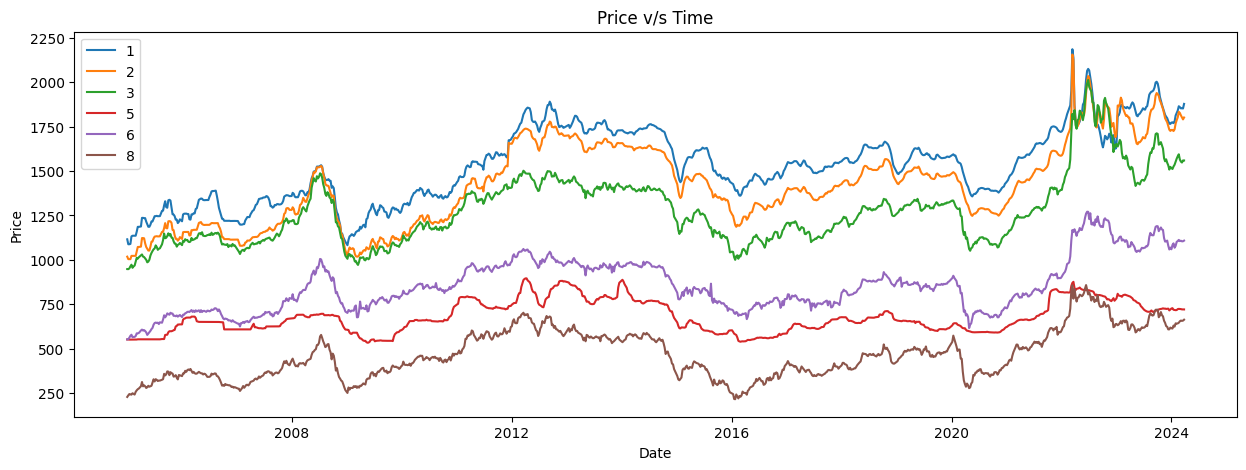

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
for key in gdata.keys():
    k=gdata.get(key)["SURVEY_DATE"]
    d=gdata.get(key)["PRICE"]
    ax.plot(k,d,label=key)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price v/s Time')
ax.legend()
plt.show()


# **FREQUENCY PLOT**

In [ ]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(15, 5))
# for key in gdata.keys():
#   sns.histplot(gdata.get(key)["PRICE"], ax=ax, label=key, kde=True)
# ax.set_xlabel('Price')
# ax.set_ylabel('Frequency')
# ax.set_title('Frequency Plot of Prices')
# ax.legend()
# plt.show()


# **Moving Average**

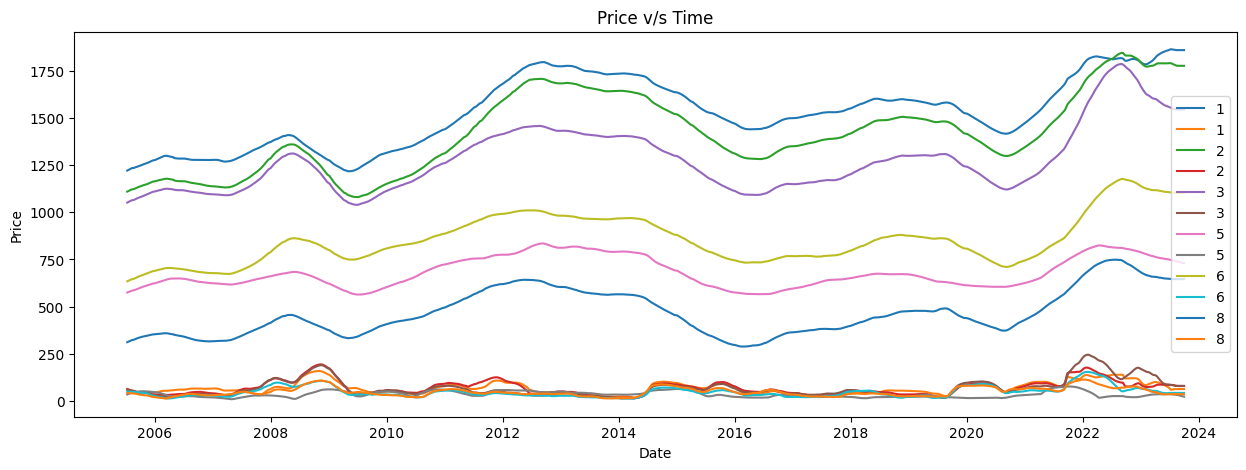

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
for key in gdata.keys():
    k=gdata.get(key)["SURVEY_DATE"]
    d=gdata.get(key)["PRICE"]
    rolling_avg = d.rolling(window=52,center=True).mean()
    rolling_std = d.rolling(window=52,center=True).std()
    ax.plot(k, rolling_avg, label=key)
    ax.plot(k, rolling_std, label=key)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Price v/s Time')
    ax.legend()
plt.show()

### **ADFT** Augmented Dickey Fuller Test


In [ ]:
for key in gdata.keys():
    result = adfuller(gdata.get(key)["PRICE"])
    print(f'ADF Statistic for {key}: {result[0]}')
    print(f'p-value for {key}: {result[1]}')
    print(f'Critical Values for {key}: {result[4]}')
    if result[1] <= 0.05:
      print(f"Strong evidence against the null hypothesis for {key}, reject the null hypothesis. Data has no unit root and is stationary")
    else:
      print(f"Weak evidence against null hypothesis for {key}, time series has a unit root, indicating it is non-stationary ")
    print('\n')


ADF Statistic for 1: -1.8578222970736176
p-value for 1: 0.35215536949835946
Critical Values for 1: {'1%': -3.437215930951362, '5%': -2.864571180534198, '10%': -2.5683839700117868}
Weak evidence against null hypothesis for 1, time series has a unit root, indicating it is non-stationary 


ADF Statistic for 2: -1.9253839347406045
p-value for 2: 0.32021552972253686
Critical Values for 2: {'1%': -3.4371943720994165, '5%': -2.8645616735407002, '10%': -2.568378906211183}
Weak evidence against null hypothesis for 2, time series has a unit root, indicating it is non-stationary 


ADF Statistic for 3: -2.423534257948384
p-value for 3: 0.13520390496667983
Critical Values for 3: {'1%': -3.43718721587049, '5%': -2.8645585177815187, '10%': -2.568377225331392}
Weak evidence against null hypothesis for 3, time series has a unit root, indicating it is non-stationary 


ADF Statistic for 5: -2.9148245282167307
p-value for 5: 0.04365106575323679
Critical Values for 5: {'1%': -3.4371729482129885, '5%': -

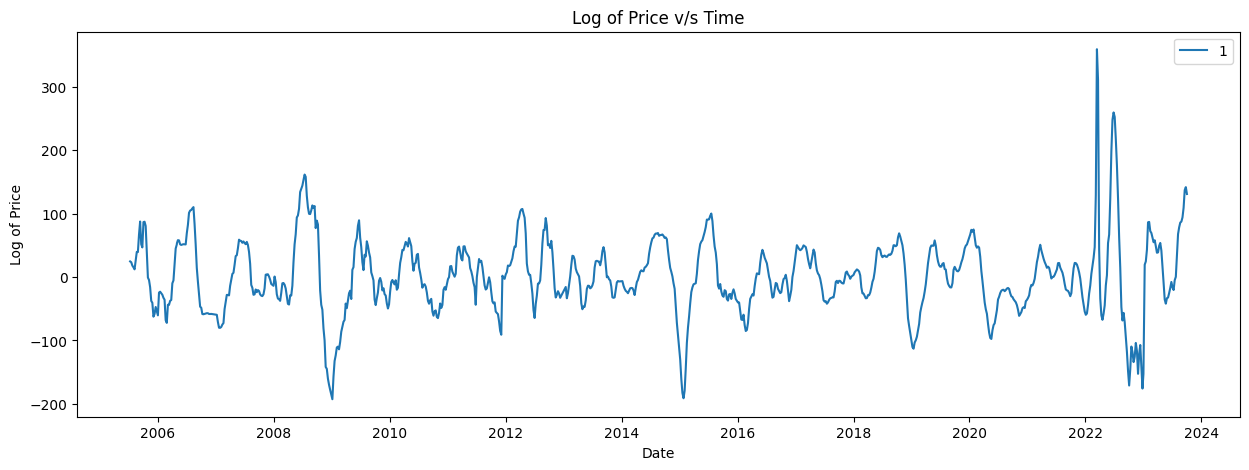

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
for key in gdata.keys():
    d=gdata.get(key)["PRICE"]
    k=gdata.get(key)["SURVEY_DATE"]
    rolling_avg = d.rolling(window=52,center=True).mean()
    kd = d-rolling_avg
    ax.plot(k, kd, label=key)
    ax.set_xlabel('Date')
    ax.set_ylabel('Log of Price')
    ax.set_title('Log of Price v/s Time')
    ax.legend()
    plt.show()


# **Detrending using Moving Average**

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# for key in gdata.keys():
#     k=gdata.get(key)["SURVEY_DATE"]
#     d=gdata.get(key)["PRICE"]
#     rolling_avg = d.rolling(window=52,center=True).mean()
#     rolling_std = d.rolling(window=52,center=True).std()
#     ax.plot(k, d, label=key)
#     ax.plot(k, rolling_avg, label=key)
#     ax.plot(k, rolling_std, label=key)
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# ax.set_title('Price v/s Time')
# ax.legend()
# plt.show()



# **Seasonality**

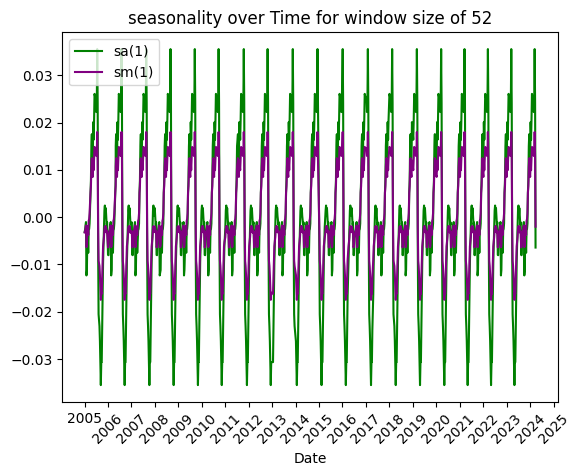

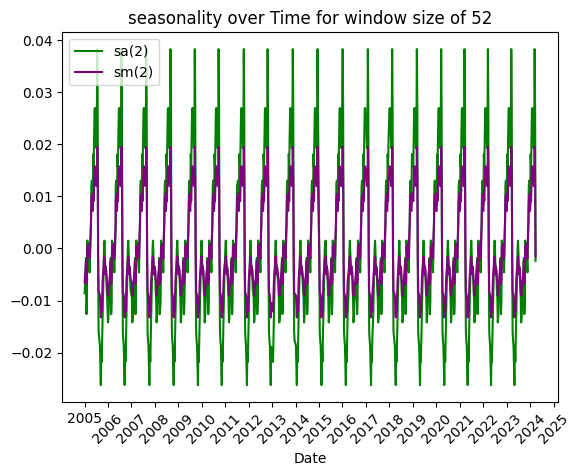

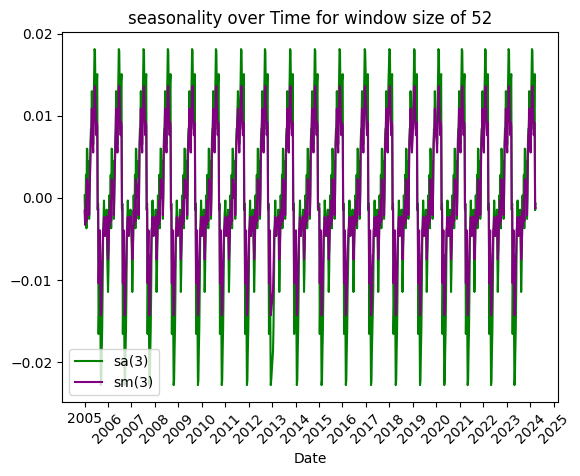

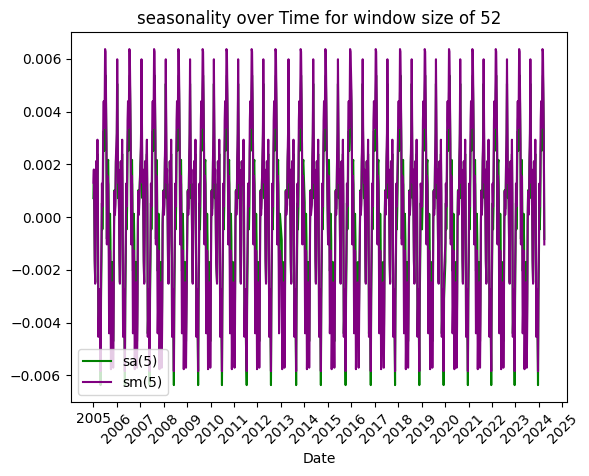

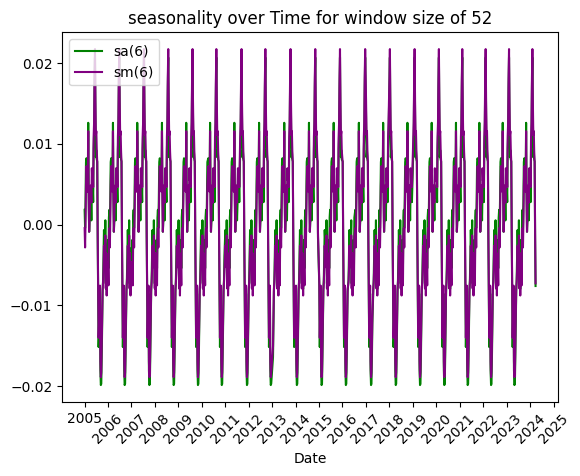

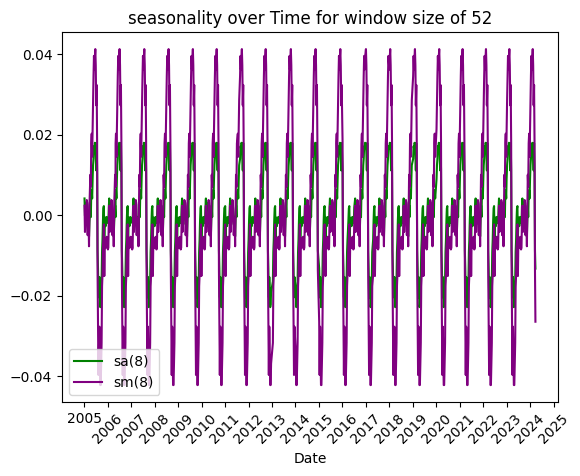

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)

    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    decomposition_m = seasonal_decompose(product_data["PRICE"], model='multiplicative', period=window)
    trend_m = decomposition_m.trend
    seasonality_m = decomposition_m.seasonal
    residual_m = decomposition_m.resid

    decomposition_a = seasonal_decompose(product_data["PRICE"], model='additive', period=window)
    trend_a = decomposition_a.trend
    seasonality_a = decomposition_a.seasonal
    residual_a = decomposition_a.resid

    plt.plot(product_data["SURVEY_DATE"],seasonality_a/800,label=f"sa({product_id})", color = 'green')             # scaled down by a factor of 800

    plt.plot(product_data["SURVEY_DATE"],seasonality_m-1,label=f"sm({product_id})", color='purple')
    plt.title(f"seasonality over Time for window size of {window}")
    plt.xlabel("Date")

    plt.legend()
    plt.show()

# **Residual**

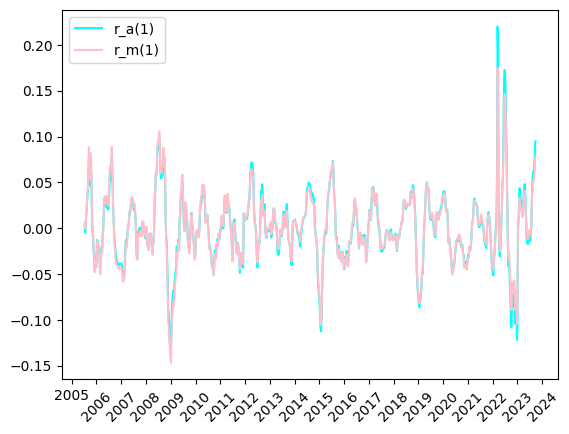

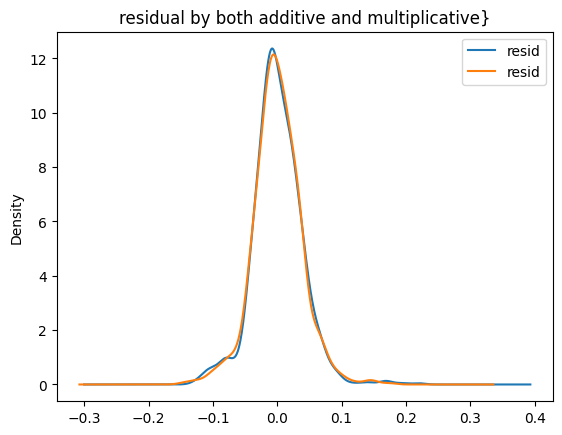

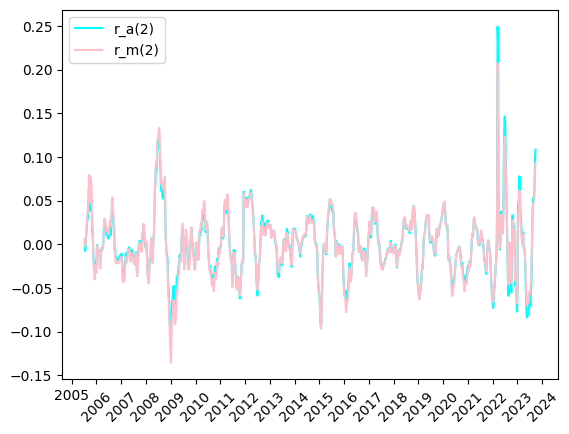

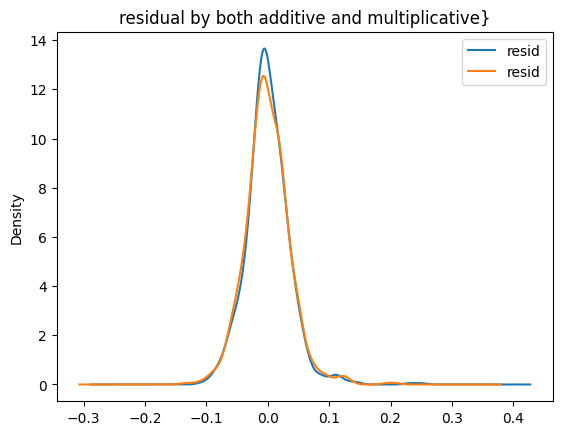

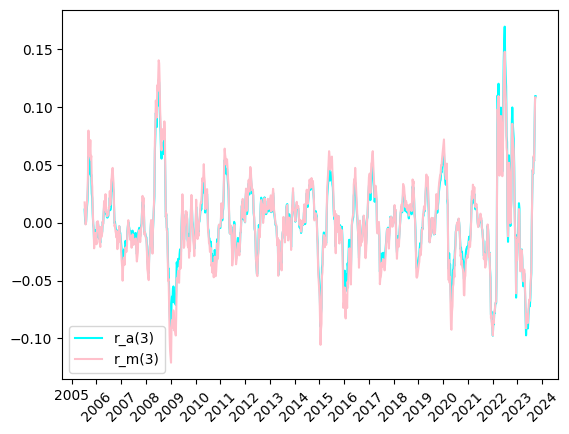

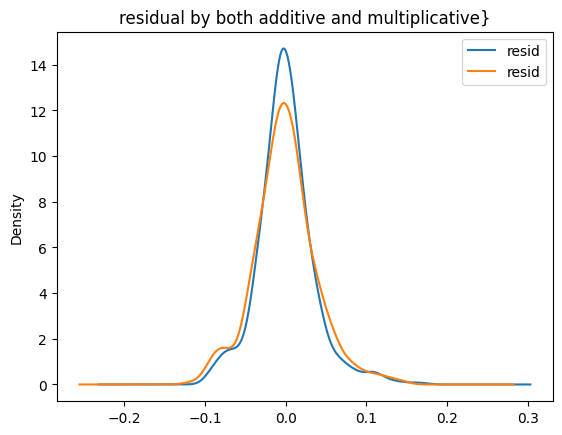

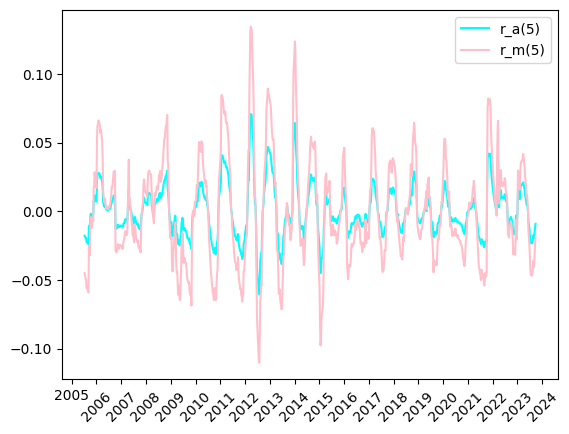

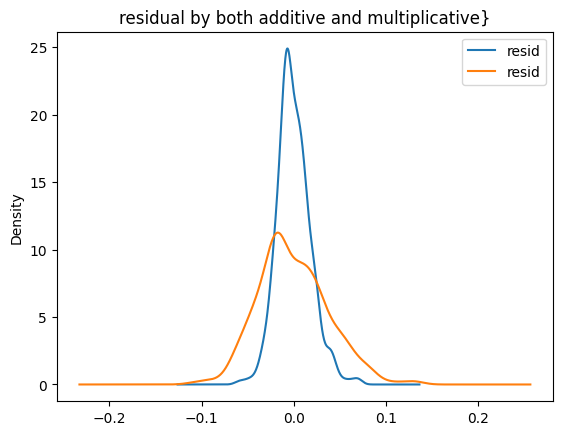

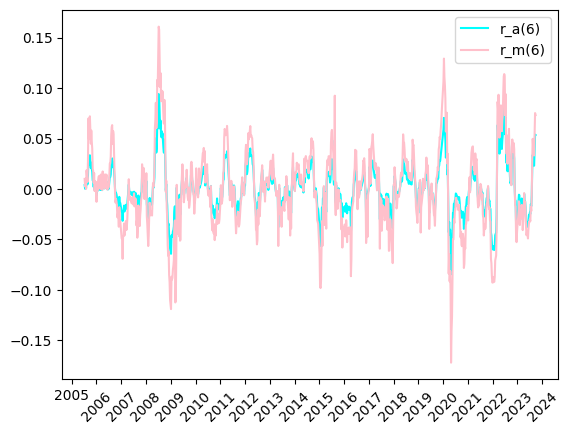

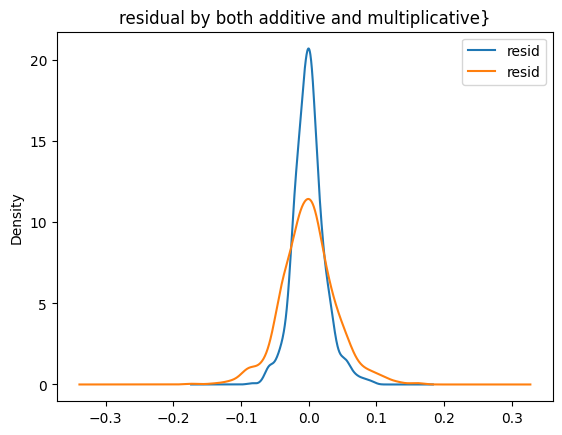

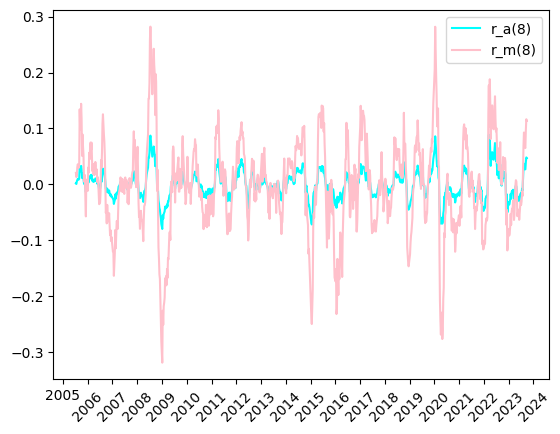

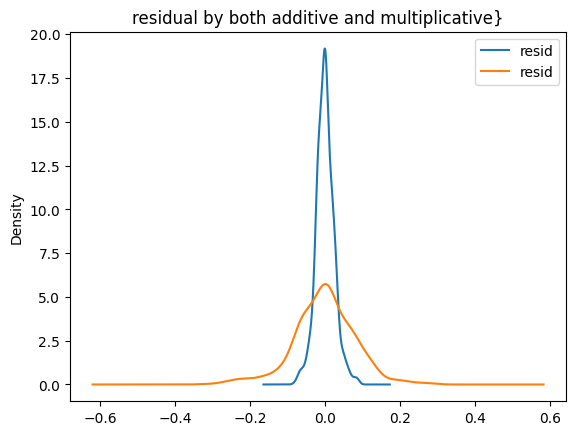

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)

    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    decomposition_m = seasonal_decompose(product_data["PRICE"], model='multiplicative', period=window)
    residual_m = decomposition_m.resid

    decomposition_a = seasonal_decompose(product_data["PRICE"], model='additive', period=window)
    residual_a = decomposition_a.resid

    plt.plot(product_data["SURVEY_DATE"],residual_a/1500,label=f"r_a({product_id})", color = 'cyan')             # scaled down by a factor of 1500
    plt.plot(product_data["SURVEY_DATE"],residual_m-1,label=f"r_m({product_id})", color='pink')
    plt.legend()
    plt.show()

    (residual_a/1500).plot(kind='density')
    (residual_m-1).plot(kind='density')
    plt.title("residual by both additive and multiplicative}")
    plt.legend()
    plt.show()

# **ACF OF RESIDUAL**

PRODUCT ID 1
(-9.097883222252436, 3.672737171052269e-15, 19, 894, {'1%': -3.4376857669714957, '5%': -2.864778351359889, '10%': -2.5684943199755765}, 7539.76861311014)
(-9.223425970524795, 1.7549170477936076e-15, 19, 894, {'1%': -3.4376857669714957, '5%': -2.864778351359889, '10%': -2.5684943199755765}, -5675.7724623358135)


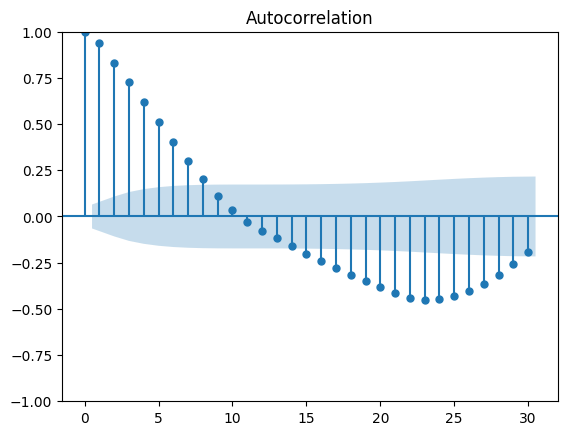

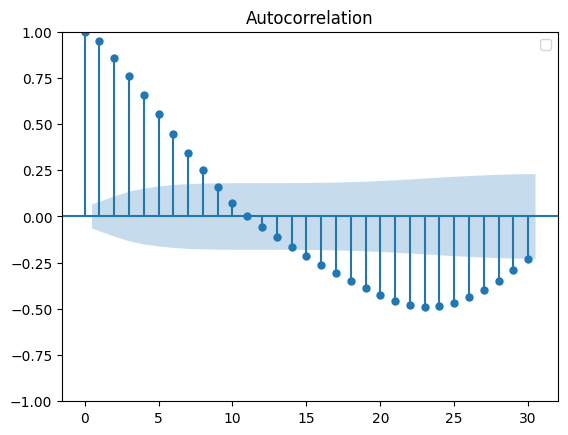

PRODUCT ID 2
(-8.776708465635513, 2.4377894793060857e-14, 19, 894, {'1%': -3.4376857669714957, '5%': -2.864778351359889, '10%': -2.5684943199755765}, 7731.955076093116)
(-8.524859876657821, 1.076010305315018e-13, 19, 894, {'1%': -3.4376857669714957, '5%': -2.864778351359889, '10%': -2.5684943199755765}, -5426.232274920807)


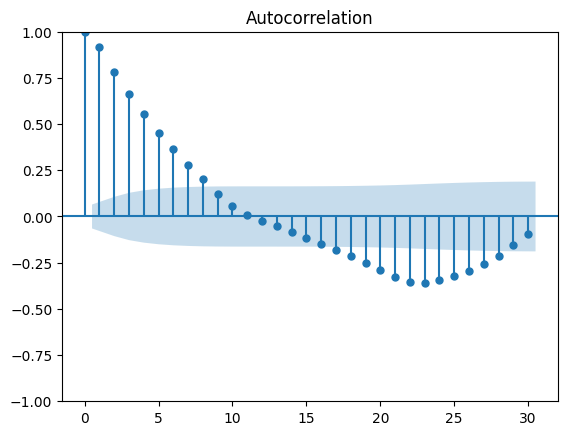

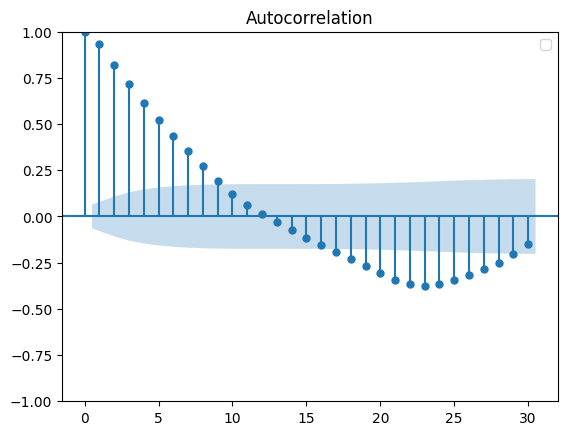

PRODUCT ID 3
(-7.845826858447476, 5.7730143770197335e-12, 18, 895, {'1%': -3.437677546895484, '5%': -2.8647747270527515, '10%': -2.568492389438532}, 7570.474329809682)
(-7.368815527910081, 9.085587308180521e-11, 8, 905, {'1%': -3.437596348122793, '5%': -2.86473892523805, '10%': -2.5684733191905007}, -5332.928956570445)


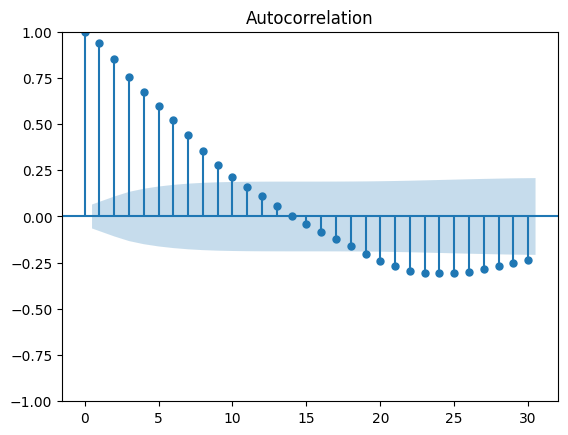

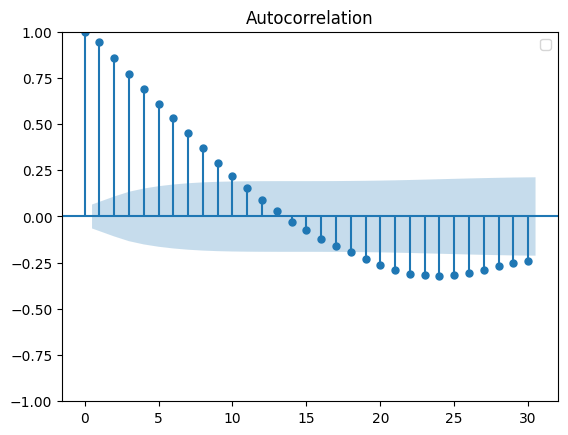

PRODUCT ID 5
(-9.567135262658962, 2.3407179870709775e-16, 5, 908, {'1%': -3.4375723382479735, '5%': -2.8647283387229963, '10%': -2.568467680189796}, 5736.38490853581)
(-9.311387594064906, 1.0467653113659487e-15, 5, 908, {'1%': -3.4375723382479735, '5%': -2.8647283387229963, '10%': -2.568467680189796}, -5981.78821229192)


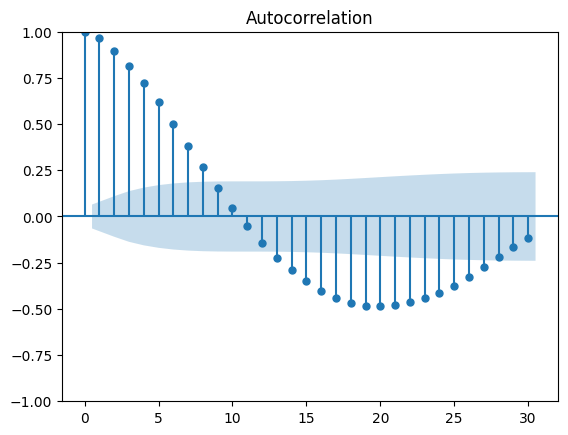

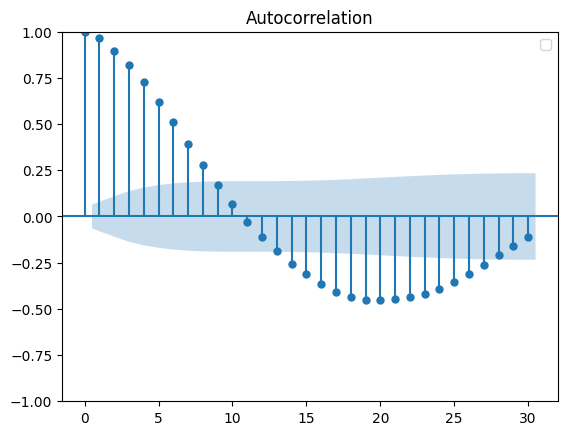

PRODUCT ID 6
(-7.715196358580806, 1.2335733739751247e-11, 12, 901, {'1%': -3.437628610719785, '5%': -2.8647531504389767, '10%': -2.5684808963896324}, 7261.430481342623)
(-7.785578419427335, 8.196985472238015e-12, 12, 901, {'1%': -3.437628610719785, '5%': -2.8647531504389767, '10%': -2.5684808963896324}, -4792.78883916096)


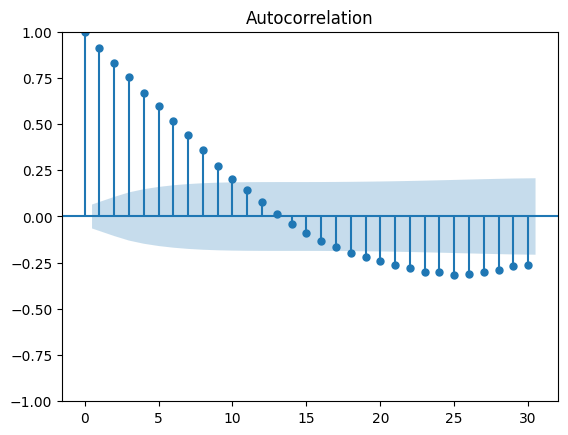

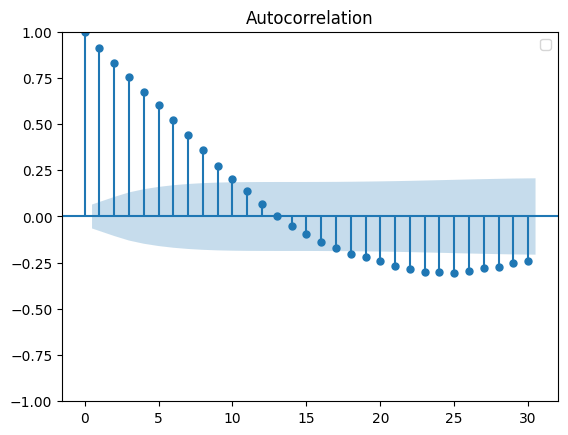

PRODUCT ID 8
(-8.045476487997064, 1.7994389647099338e-12, 14, 899, {'1%': -3.4376448499903653, '5%': -2.8647603105890442, '10%': -2.568484710325773}, 7157.954363676763)


(-8.449988734026007, 1.6724598720965266e-13, 7, 906, {'1%': -3.4375883271133243, '5%': -2.8647353885968214, '10%': -2.568471435365895}, -3813.5801756812225)


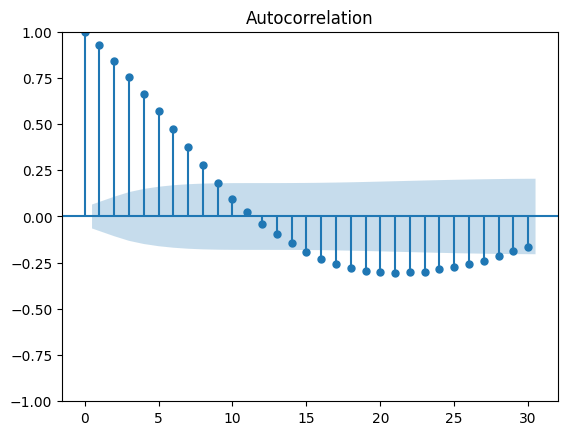

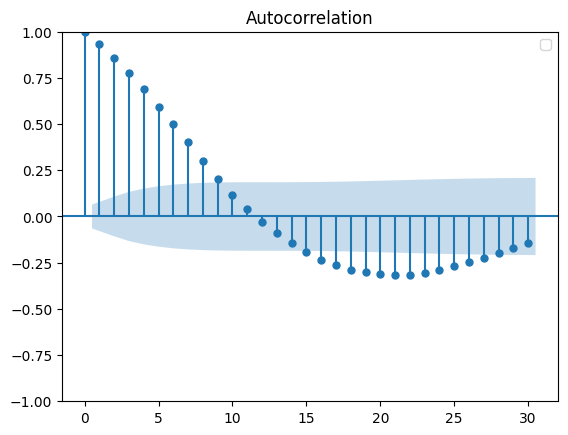

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    decomposition_m = seasonal_decompose(product_data["PRICE"], model='multiplicative', period=52)
    # trend_m = decomposition_m.trend
    # seasonality_m = decomposition_m.seasonal
    residual_m = decomposition_m.resid

    decomposition_a = seasonal_decompose(product_data["PRICE"], model='additive', period=52)
    # trend_a = decomposition_a.trend
    # seasonality_a = decomposition_a.seasonal
    residual_a = decomposition_a.resid

    print("PRODUCT ID",product_id)
    residual_a = residual_a.replace([np.inf, -np.inf], np.nan)
    residual_a = residual_a.dropna()
    kanishk_0  = adfuller(residual_a)
    print(kanishk_0)

    residual_m = residual_m.replace([np.inf, -np.inf], np.nan)
    residual_m = residual_m.dropna()
    kanishk_1  = adfuller(residual_m)
    print(kanishk_1)

    plot_acf(residual_a)
    plot_acf(residual_m)

    plt.legend()
    plt.show()

# AVG PRICE BY WEEK

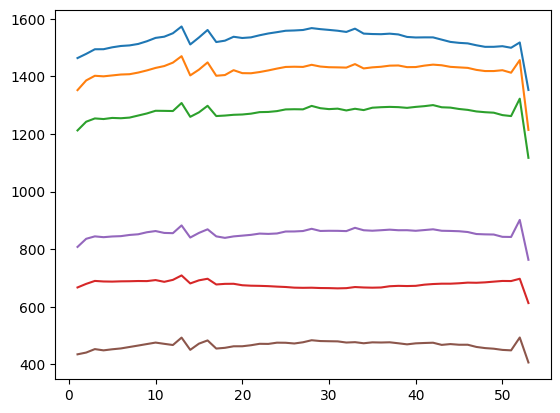

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    product_data['SURVEY_DATE'] = pd.to_datetime(product_data['SURVEY_DATE'])
    grouped = product_data.groupby([product_data['SURVEY_DATE'].dt.isocalendar().week,
                                    product_data['PRODUCT_ID']])

    avg_price_by_week = grouped['PRICE'].mean()
    avg_price_by_week_df = avg_price_by_week.reset_index()
    avg_price_by_week_df.columns = ['Week', 'PRODUCT_ID', 'Average_Price']

    plt.plot(avg_price_by_week_df.Week,avg_price_by_week_df.Average_Price)

# **log(Prices)** *v/s* **Time**

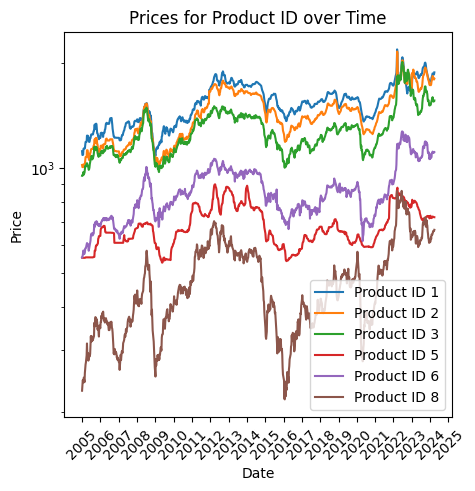

In [ ]:
plt.figure(figsize=(5,5))
for product_id in df["PRODUCT_ID"].unique():

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())                #### make each tick represent a year.
    plt.xticks(rotation=45)                                                #### Rotate the x-axis labels for better readability

    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
    plt.plot(product_data["SURVEY_DATE"], product_data["PRICE"], label=f"Product ID {product_id}",)
    plt.yscale('log')                                                      ### log scale
    plt.title(f"Prices for Product ID over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
plt.show()

# **diff of Prices** *v/s* **Time**

0.7890466321243524


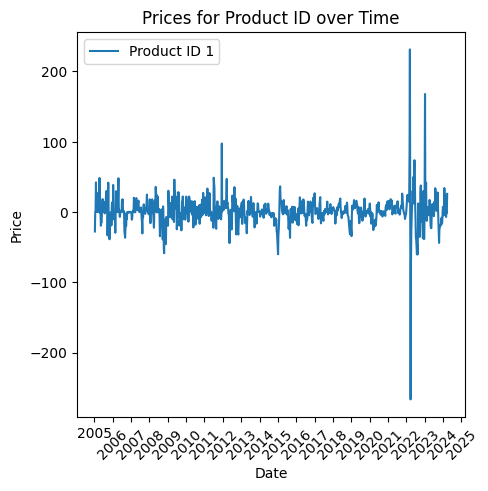

0.810818652849741


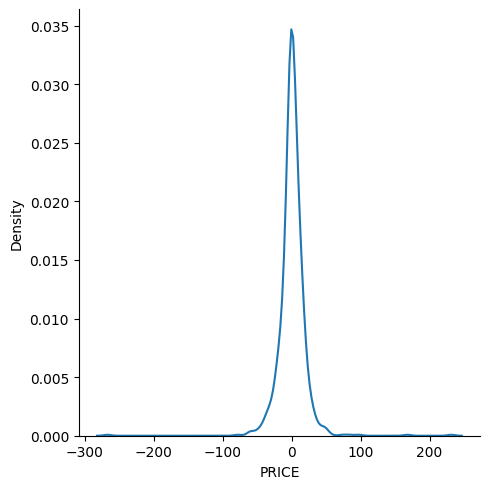

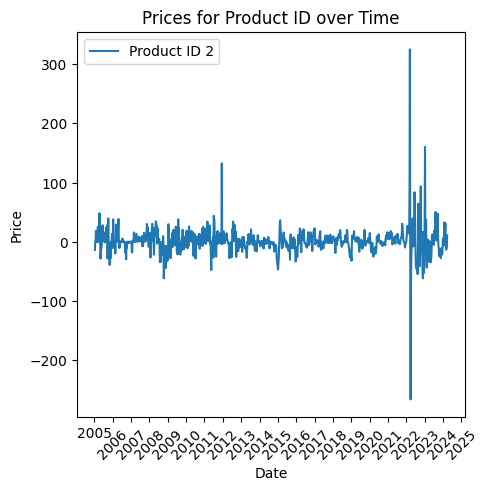

0.6326839378238341


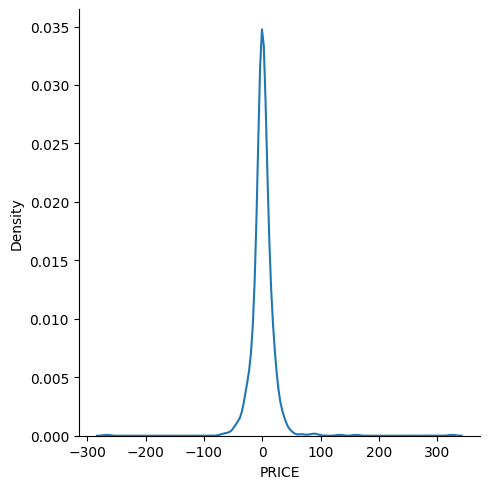

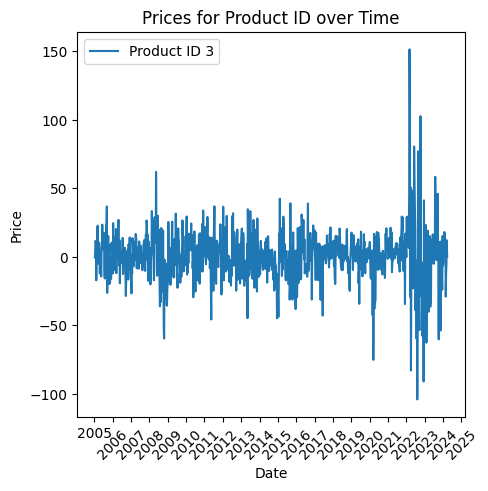

0.175139896373057


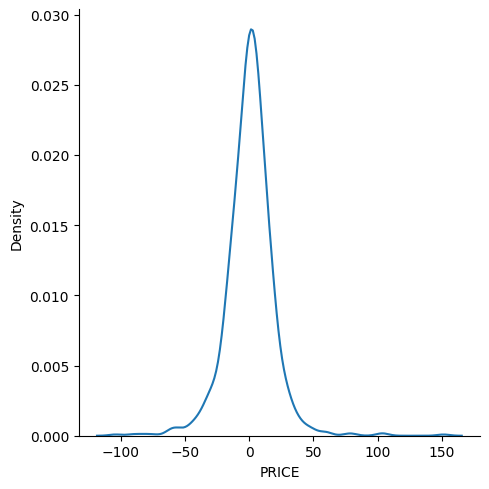

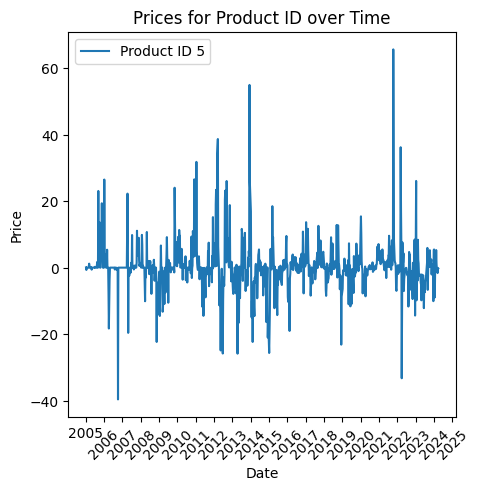

0.5753886010362694


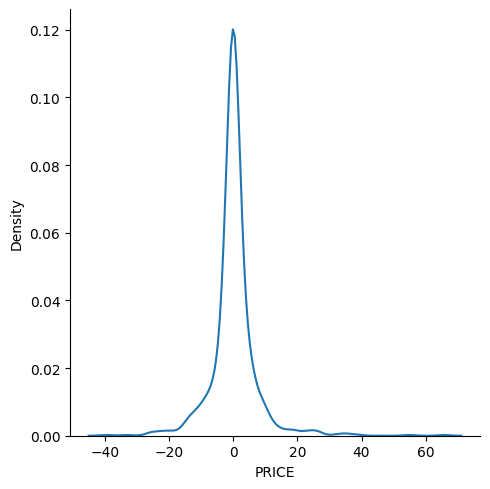

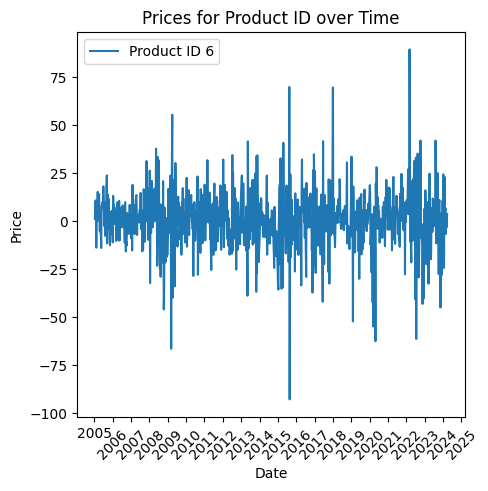

0.45014507772020723


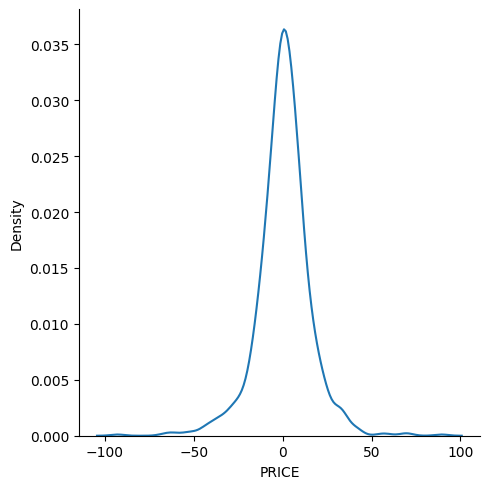

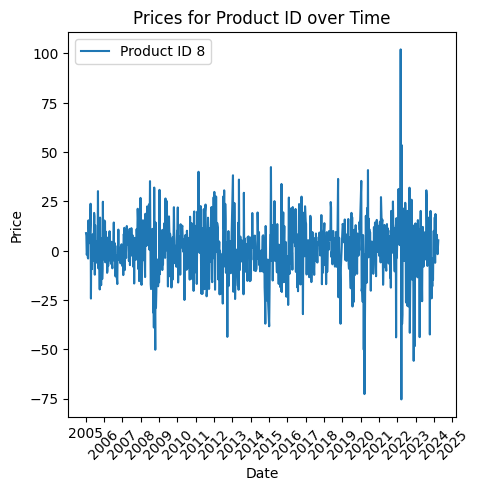

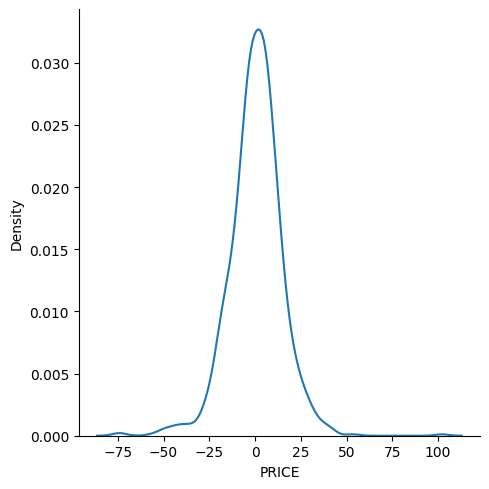

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    plt.figure(figsize=(5,5))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())                #### make each tick represent a year.
    plt.xticks(rotation=45)                                                #### Rotate the x-axis labels for better readability

    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
    plt.plot(product_data["SURVEY_DATE"], product_data["PRICE"].diff(), label=f"Product ID {product_id}",)
    print(product_data["PRICE"].diff().mean())
    plt.title(f"Prices for Product ID over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    sns.displot((product_data["PRICE"].diff()),kind='kde')


# **diff of log(Prices)** *v/s* **Time**

0.0005391127732521748


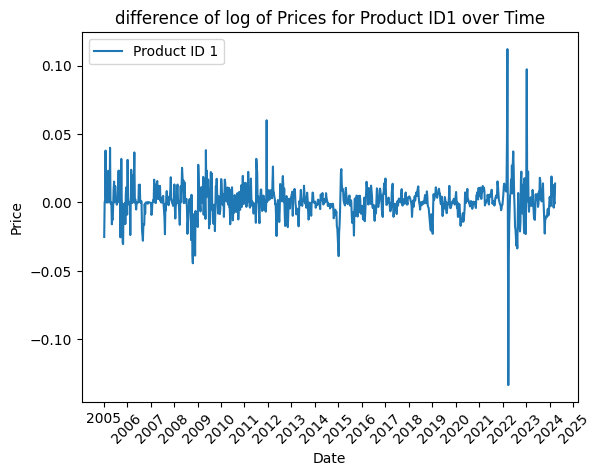

0.000590747829531891


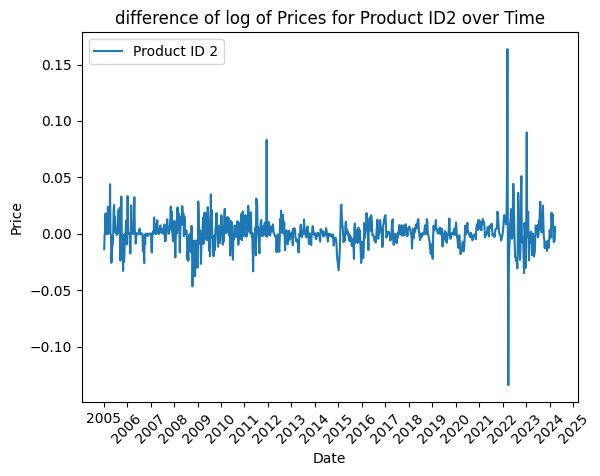

0.0005149676029288078


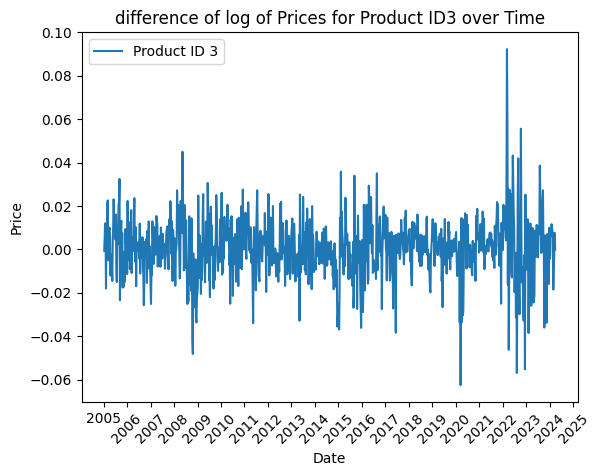

0.00027657285465267247


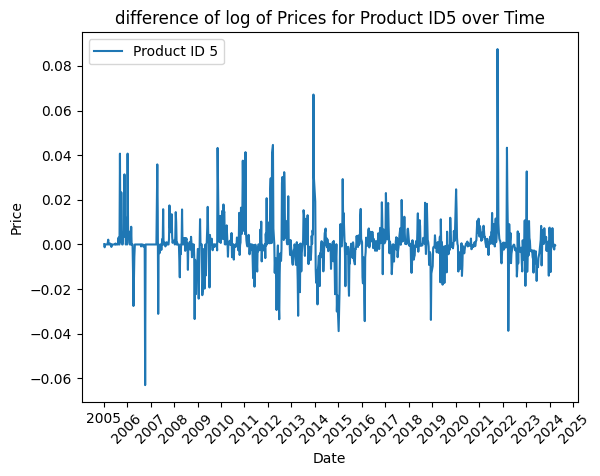

0.0007201586011660176


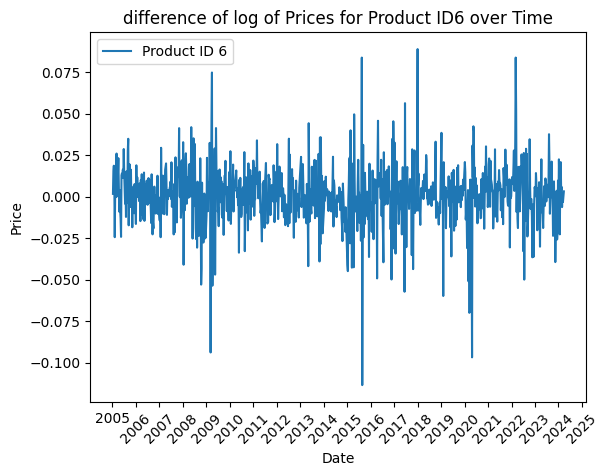

0.0011006802346611182


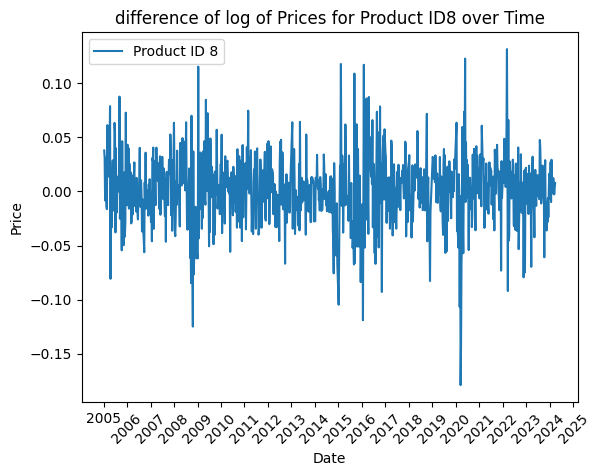

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    # plt.figure(figsize=(5,5))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())                #### make each tick represent a year.
    plt.xticks(rotation=45)                                                #### Rotate the x-axis labels for better readability
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
    plt.plot(product_data["SURVEY_DATE"], (np.log(product_data["PRICE"])).diff(), label=f"Product ID {product_id}",)
    print((np.log(product_data["PRICE"]).diff()).mean())
    plt.title(f"difference of log of Prices for Product ID{product_id} over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

### ***VOLATILITY*** in the above graph

# ***MOVING VARIANCE***

In [ ]:
# for product_id in df["PRODUCT_ID"].unique():
#     plt.gca().xaxis.set_major_locator(mdates.YearLocator())                #### make each tick represent a year.
#     plt.xticks(rotation=45)                                                #### Rotate the x-axis labels for better readability

#     product_data = df[df["PRODUCT_ID"] == product_id]
#     product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
#     rolling_var = product_data["PRICE"].rolling(window=window).var()
#     plt.plot(product_data["SURVEY_DATE"], rolling_var, label=f"Moving Var {product_id}")
#     plt.title(f"Moving Var of Prices over Time for a window of {window}")
#     plt.xlabel("Date")
#     plt.ylabel("Moving Var of Price")
#     # print(rolling_avg, product_data["SURVEY_DATE"])
#     plt.legend()
#     plt.show()


#AUGMENTED DICKEY FULLER TEST ON ORIGINAL SERIES AND THE DIFFERENCE OF SERIES

In [ ]:
# # AUGMENTED DICKEY FULLER TEST ON ORIGINAL SERIES AND THE DIFFERENCE OF SERIES
for product_id in df["PRODUCT_ID"].unique():
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
    kanishk  = adfuller(product_data["PRICE"])
    print('product ID',product_id)
    print(kanishk)

print('\n','LOG')

for product_id in df["PRODUCT_ID"].unique():
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
    product_data["log_PRICE"]=np.log(product_data["PRICE"])
    kanishk_0  = adfuller(product_data["log_PRICE"])
    print('product ID',product_id)
    print(kanishk_0)

print('\n','DIFFERENCE_LOG')

for product_id in df["PRODUCT_ID"].unique():
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    product_data["log_PRICE_diff"] = (product_data["PRICE"]).diff()
    product_data["log_PRICE_diff"] = product_data["log_PRICE_diff"].replace([np.inf, -np.inf], np.nan)
    product_data = product_data.dropna(subset=["log_PRICE_diff"])
    kanishk_1  = adfuller(product_data["log_PRICE_diff"])
    print('product ID',product_id)
    print(kanishk_1)
# print('\n')

product ID 1
(-1.8578222970736176, 0.35215536949835946, 10, 955, {'1%': -3.437215930951362, '5%': -2.864571180534198, '10%': -2.5683839700117868}, 8105.047382457949)
product ID 2
(-1.9253839347406045, 0.32021552972253686, 7, 958, {'1%': -3.4371943720994165, '5%': -2.8645616735407002, '10%': -2.568378906211183}, 8295.485885952185)
product ID 3
(-2.423534257948384, 0.13520390496667983, 6, 959, {'1%': -3.43718721587049, '5%': -2.8645585177815187, '10%': -2.568377225331392}, 8125.3781777569075)
product ID 5
(-2.9148245282167307, 0.04365106575323679, 4, 961, {'1%': -3.4371729482129885, '5%': -2.8645522259969534, '10%': -2.568373874086242}, 6188.46025139391)
product ID 6
(-2.0844570567804483, 0.2508102502406464, 5, 960, {'1%': -3.437180074590612, '5%': -2.8645553686071326, '10%': -2.5683755479600694}, 7803.196451199801)
product ID 8
(-2.176732225148264, 0.21479842510911157, 3, 962, {'1%': -3.4371658366910216, '5%': -2.8645490899304784, '10%': -2.5683722036989813}, 7703.874763938047)

 LOG
pr

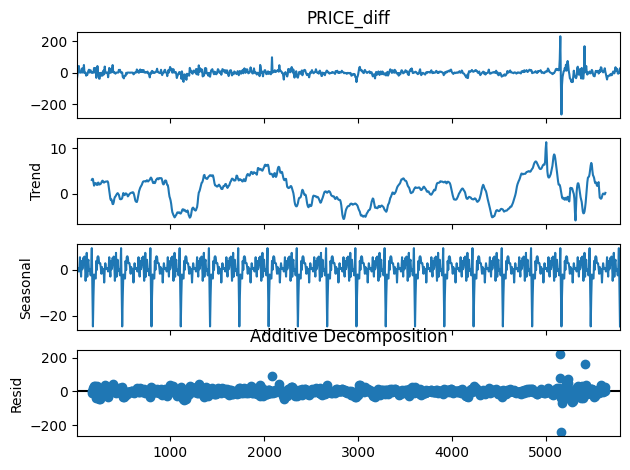

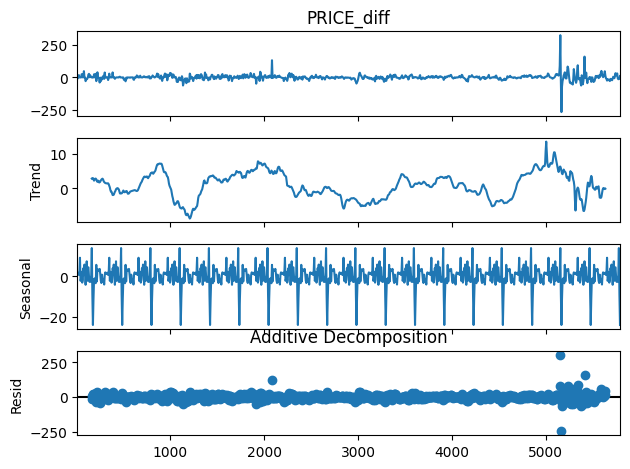

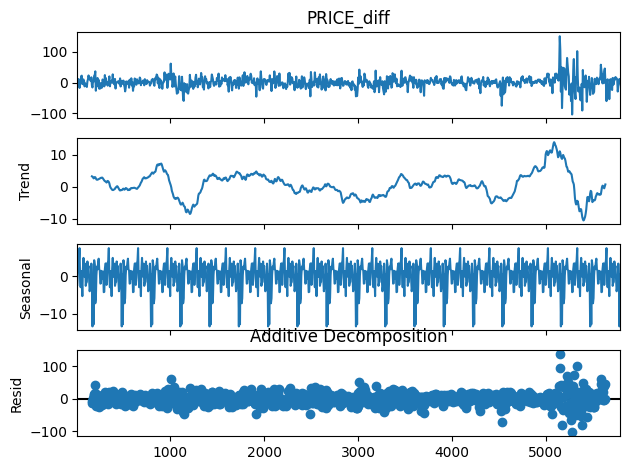

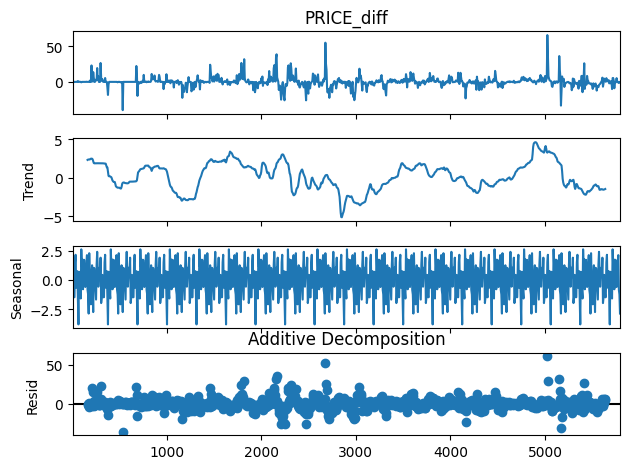

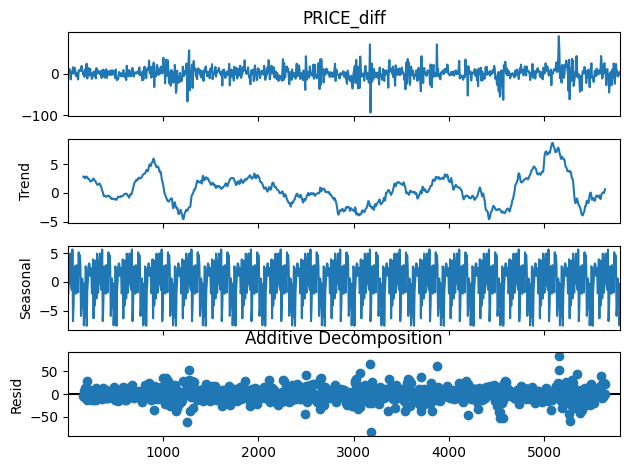

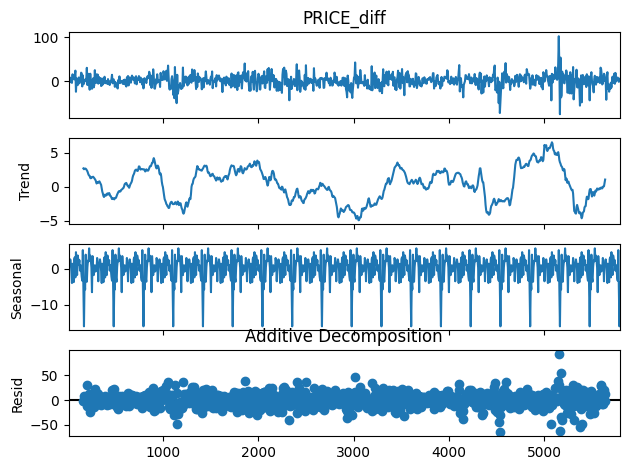

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    product_data["PRICE_diff"] = (product_data["PRICE"]).diff()
    product_data["PRICE_diff"] = product_data["PRICE_diff"].replace([np.inf, -np.inf], np.nan)
    product_data = product_data.dropna(subset=["PRICE_diff"])

    #STL decomposition
    decomposition = seasonal_decompose(product_data["PRICE_diff"], model='additive', period=window)
    decomposition.plot()
    plt.title('Additive Decomposition')
    plt.show()


################################## multiplicative seasonal decompositions is not suggested for difference of prices because of negative values

    # decomposition = seasonal_decompose(product_data["PRICE_diff"], model='multiplicative', period=window)
    # decomposition.plot()
    # plt.title('Multiplicative Decomposition')
    # plt.show()

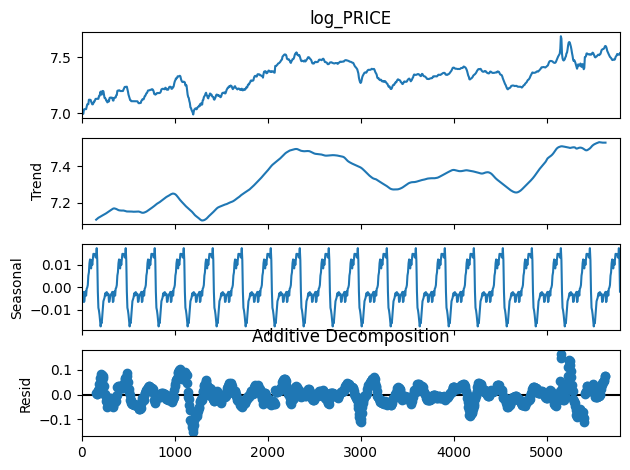

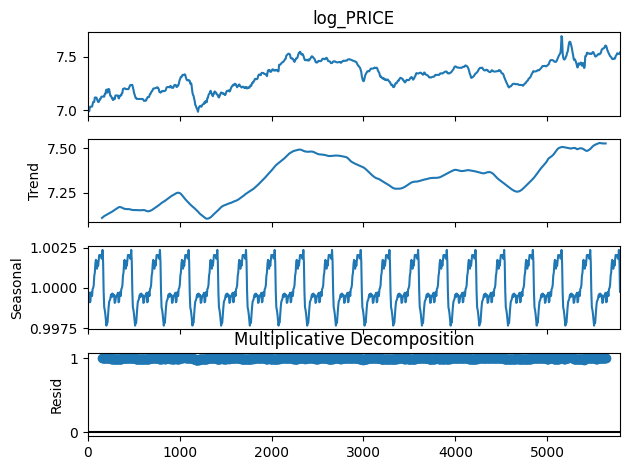

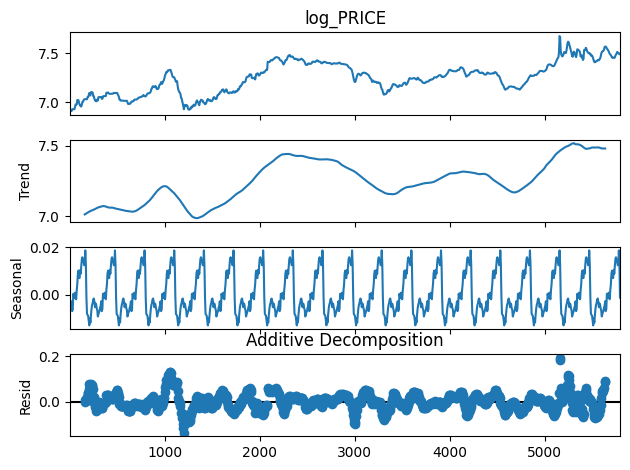

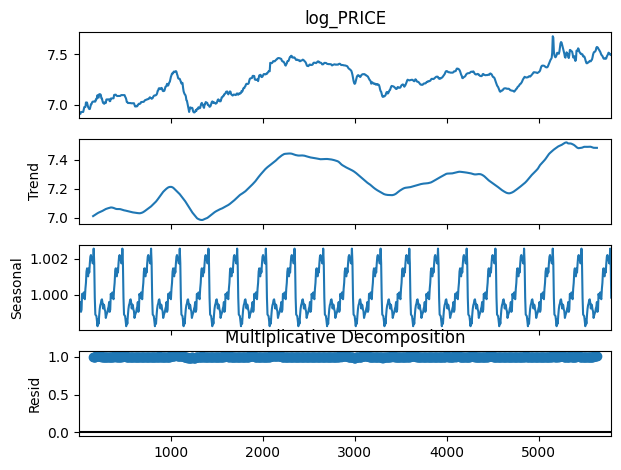

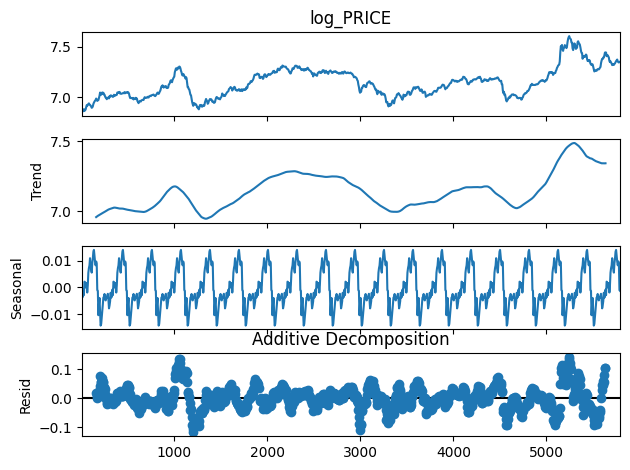

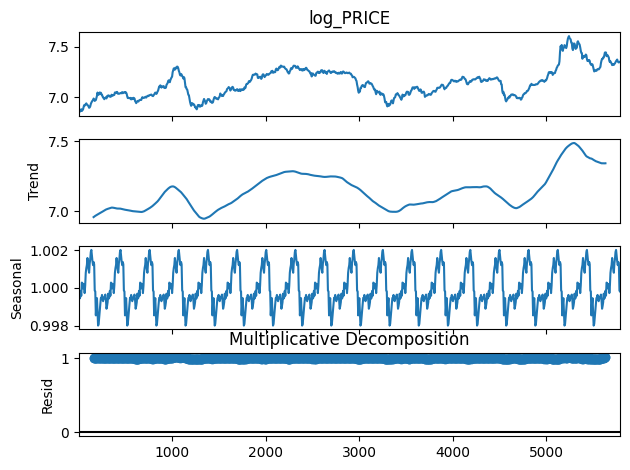

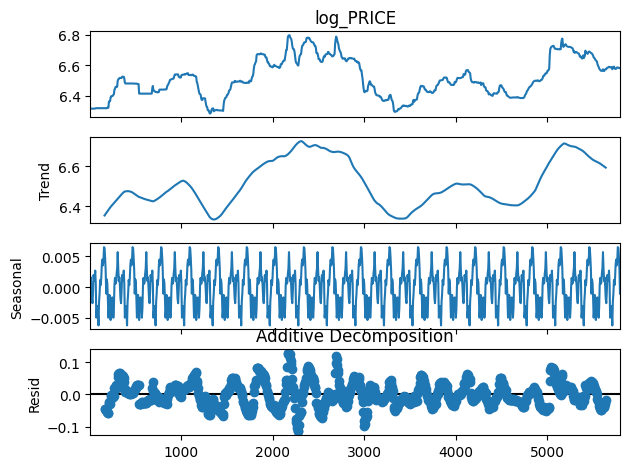

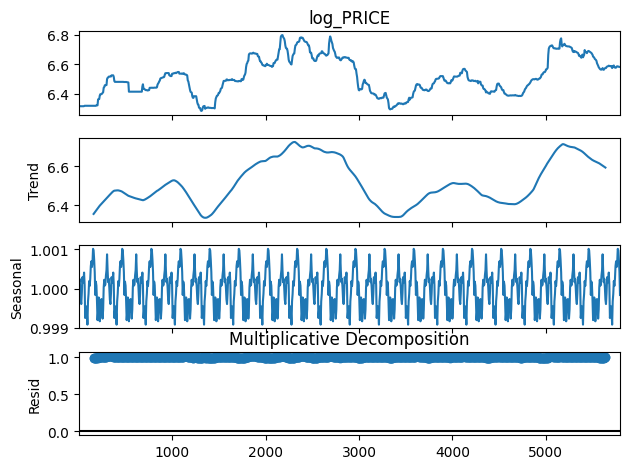

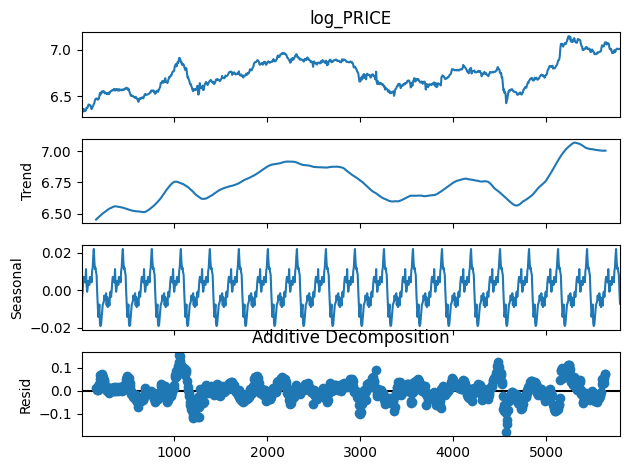

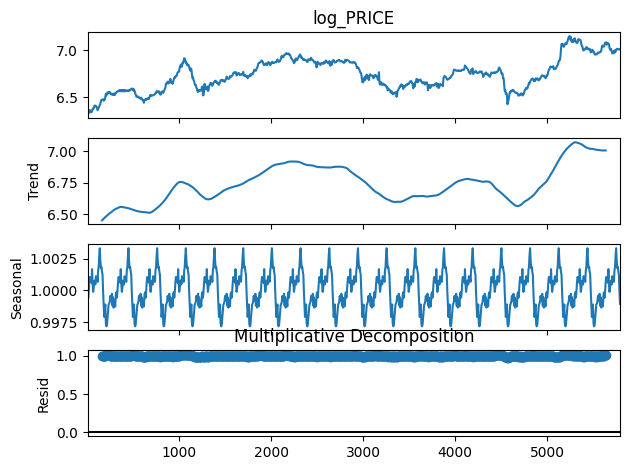

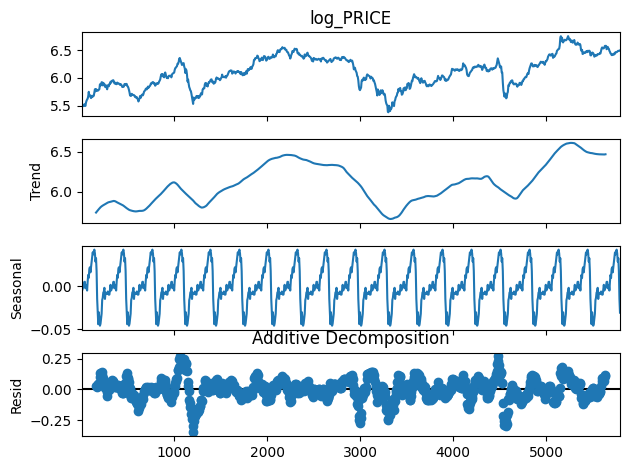

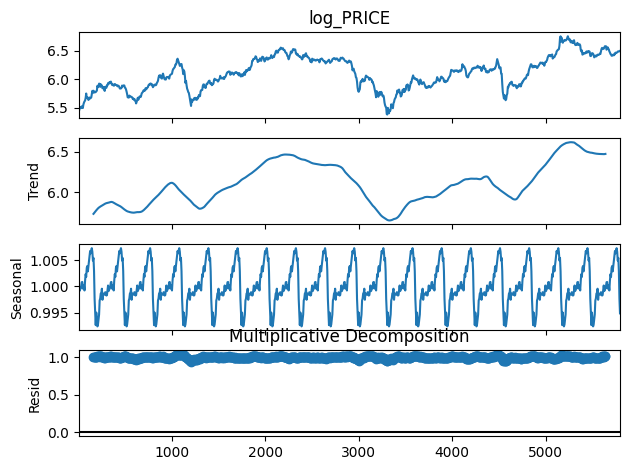

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    product_data["log_PRICE"] = np.log(product_data["PRICE"])
    product_data["log_PRICE"] = product_data["log_PRICE"].replace([np.inf, -np.inf], np.nan)

    product_data = product_data.dropna(subset=["log_PRICE"])

    #STL decomposition
    decomposition = seasonal_decompose(product_data["log_PRICE"], model='additive', period=window)
    decomposition.plot()
    plt.title('Additive Decomposition')
    plt.show()
    decomposition = seasonal_decompose(product_data["log_PRICE"], model='multiplicative', period=window)
    decomposition.plot()
    plt.title('Multiplicative Decomposition')
    plt.show()

1


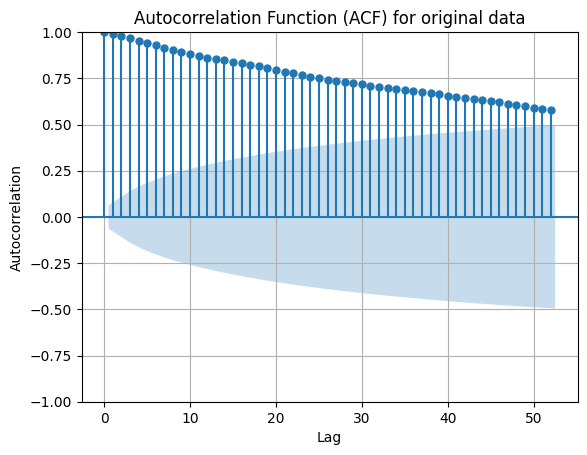

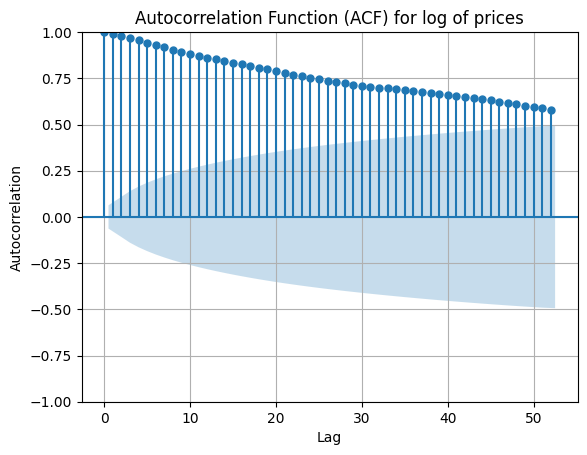

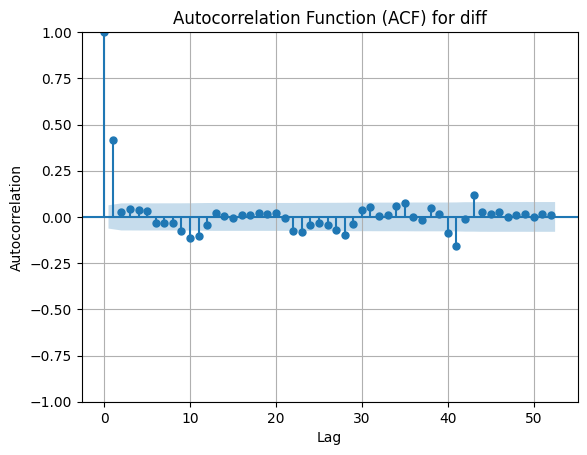

2


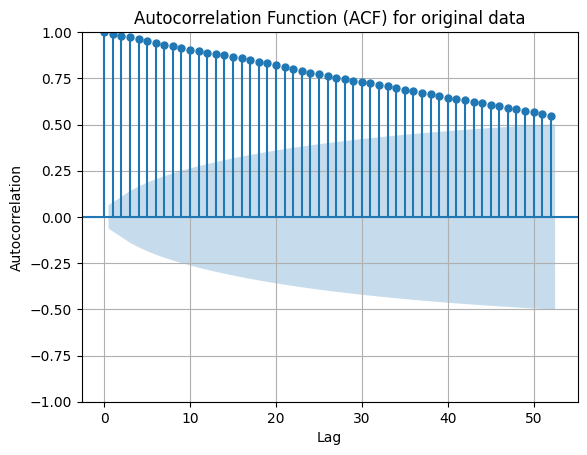

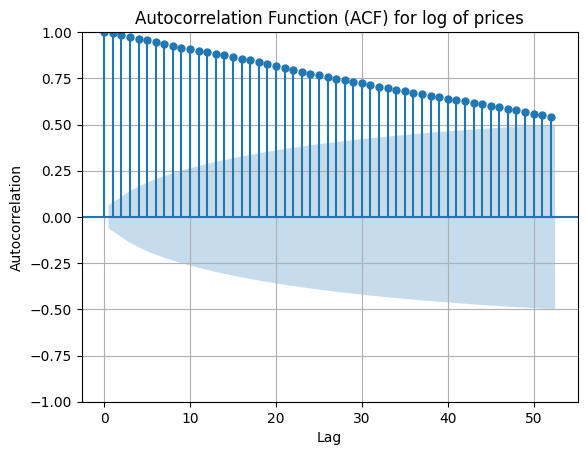

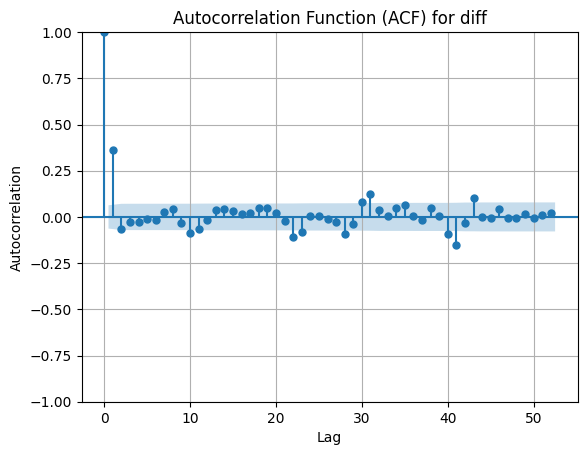

3


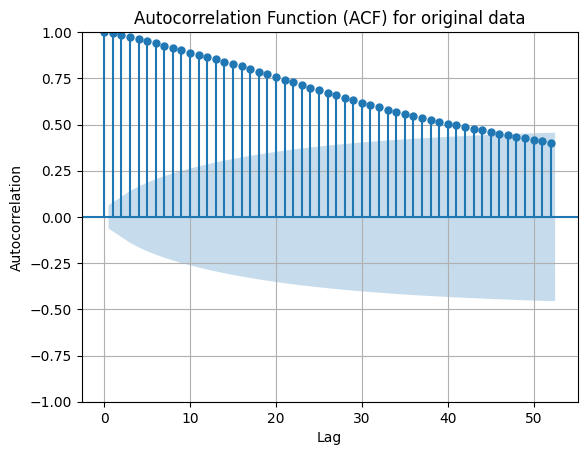

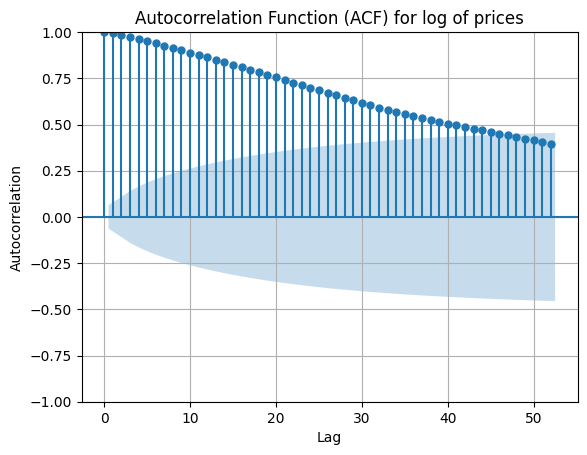

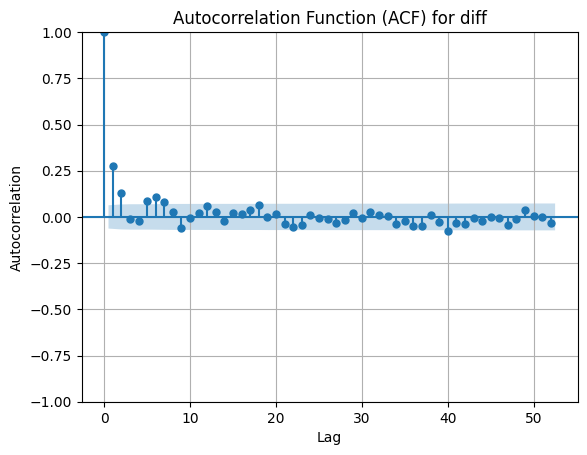

5


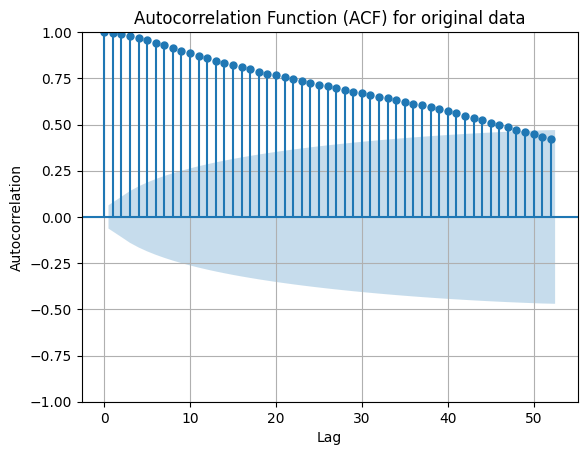

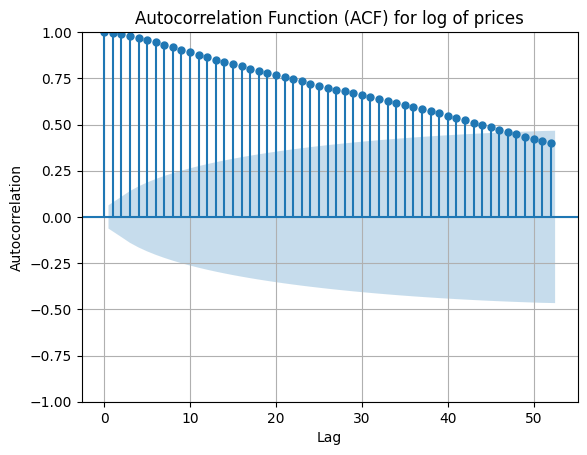

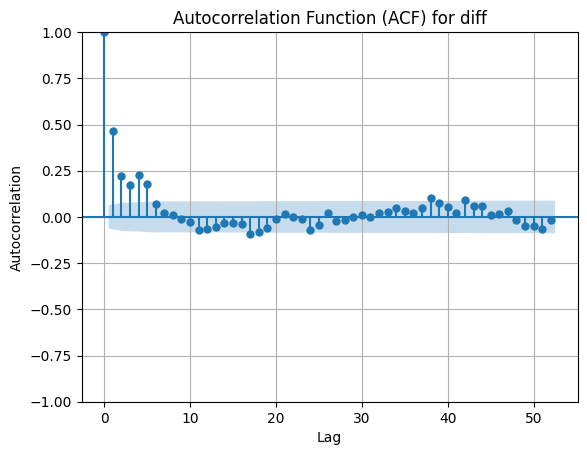

6


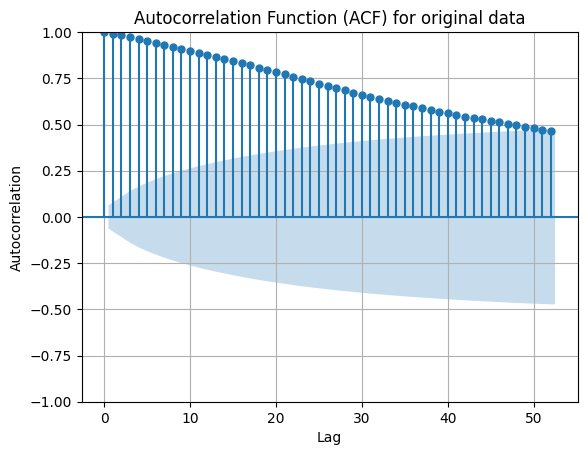

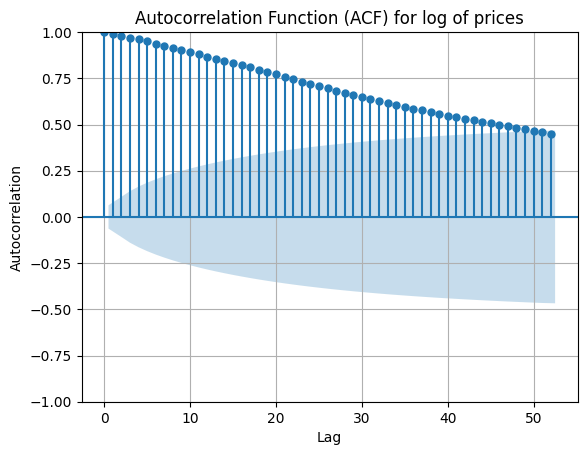

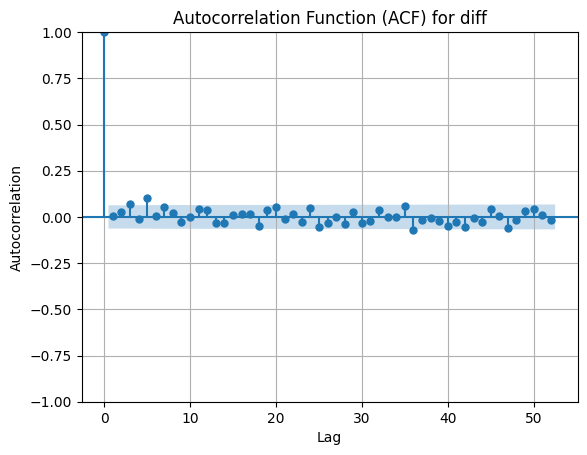

8


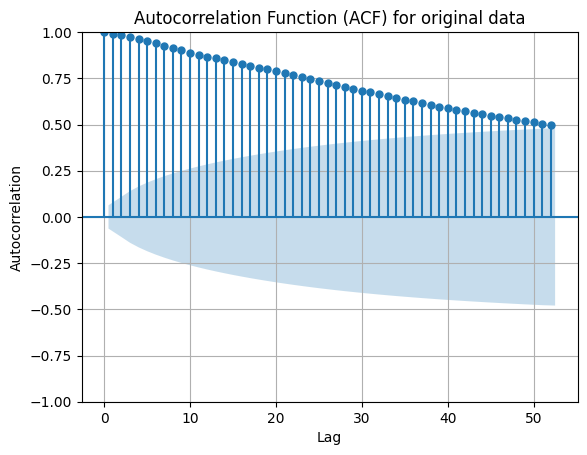

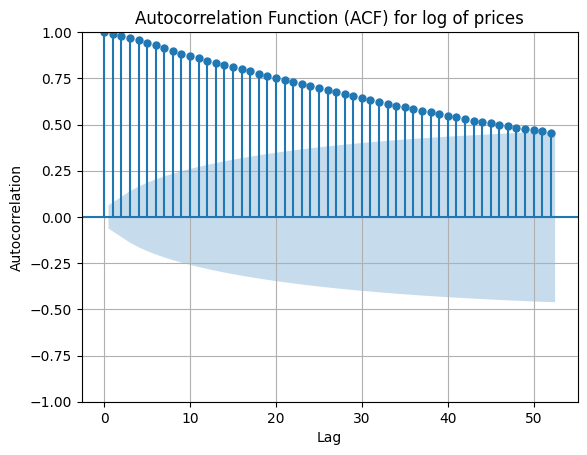

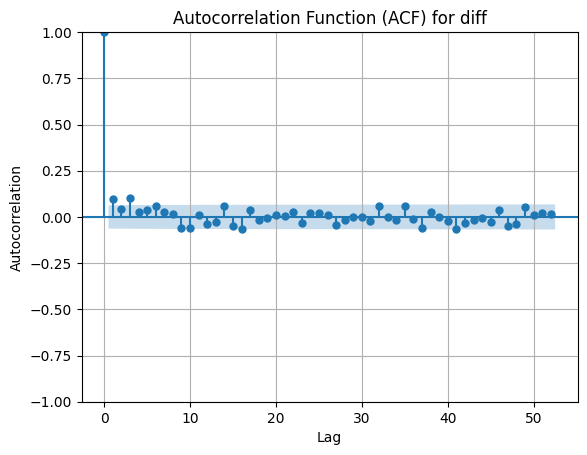

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
    print(product_id)
    product_data = df[df["PRODUCT_ID"] == product_id]
    product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)

    product_data["log_PRICE"] = np.log(product_data["PRICE"])
    product_data["log_PRICE"] = product_data["log_PRICE"].replace([np.inf, -np.inf], np.nan)

    product_data["PRICE_diff"] = ((product_data["PRICE"]).diff())
    product_data["PRICE_diff"] = product_data["PRICE_diff"].replace([np.inf, -np.inf], np.nan)
    product_data = product_data.dropna(subset=["PRICE_diff"])

    plot_acf(product_data["PRICE"], lags=window, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF) for original data')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

    plot_acf(product_data["log_PRICE"], lags=window, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF) for log of prices')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

    plot_acf(product_data["PRICE_diff"], lags=window, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF) for diff')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# **ACF OF PRICE, PRICE DIFF AND PACF**

1


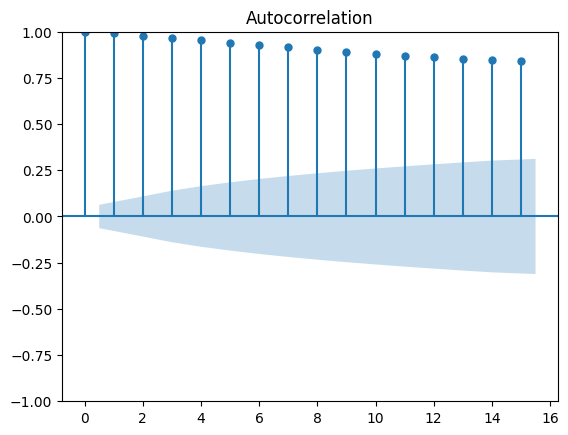

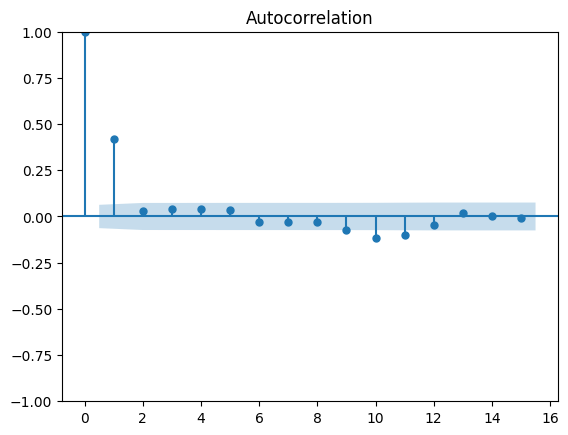

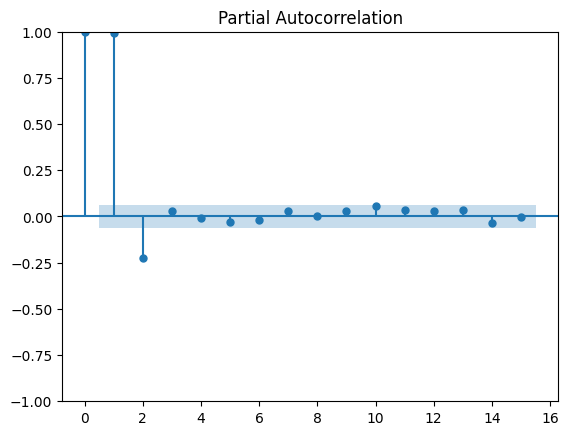

2


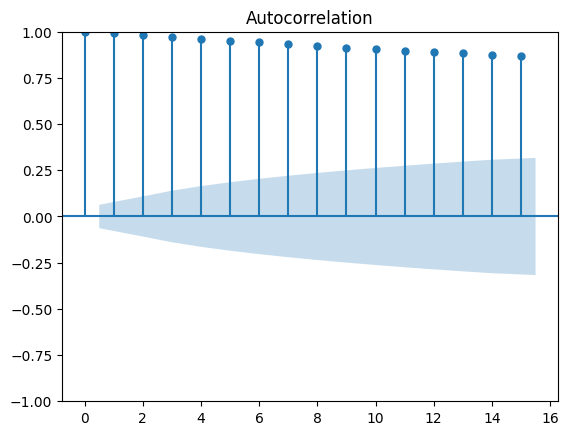

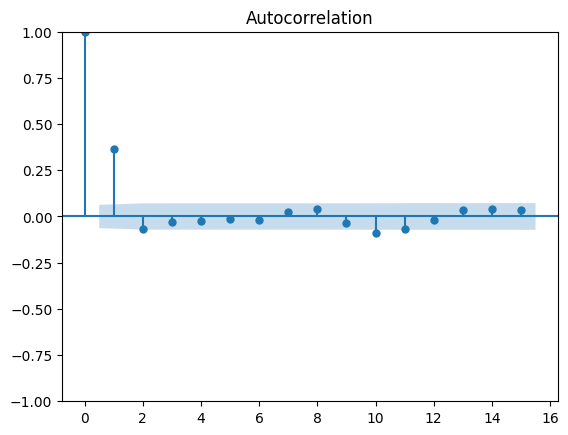

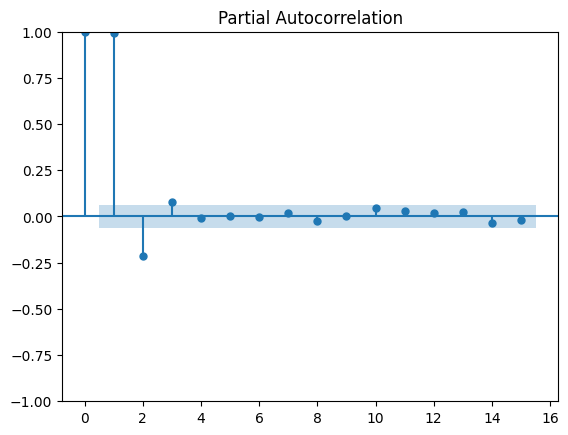

3


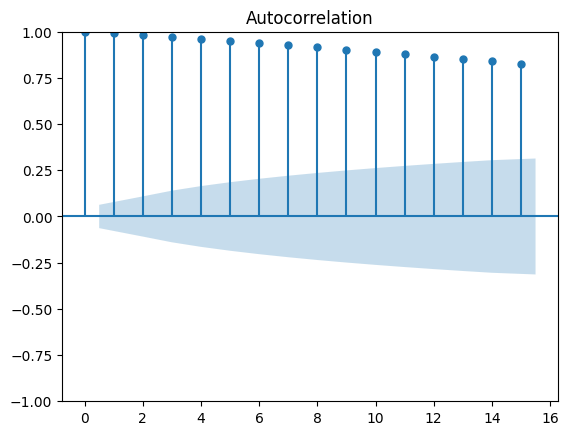

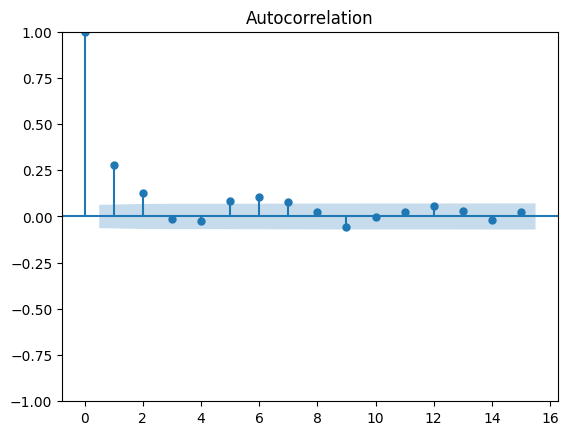

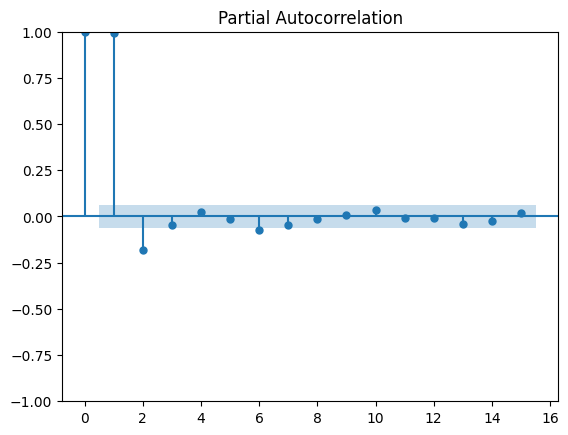

5


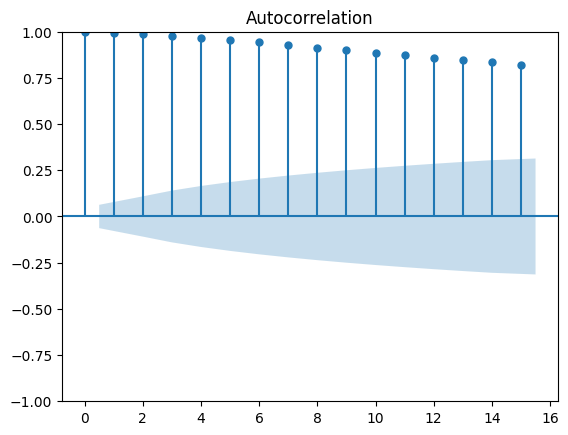

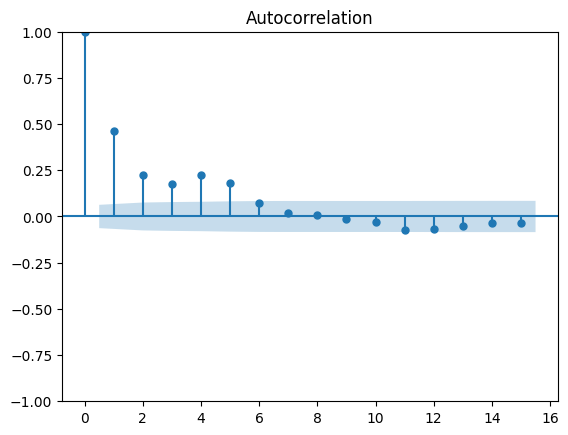

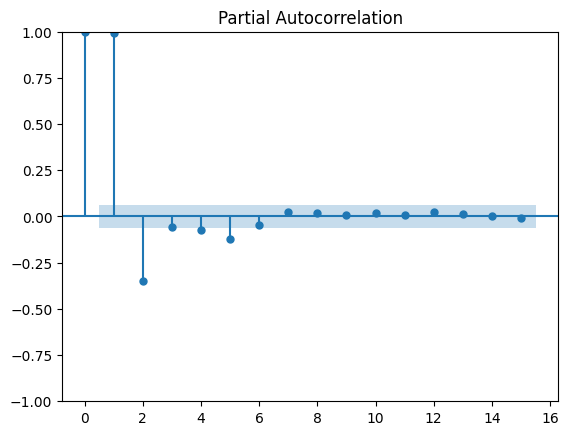

6


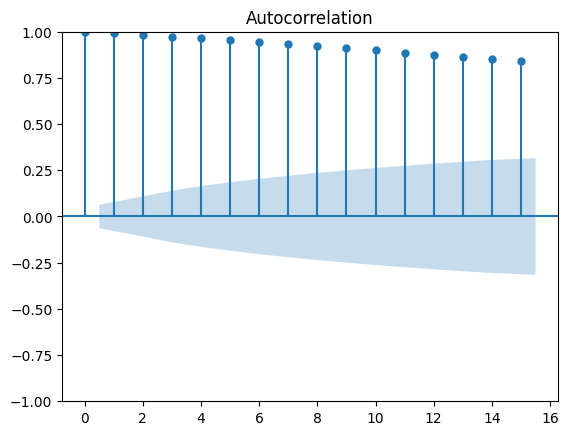

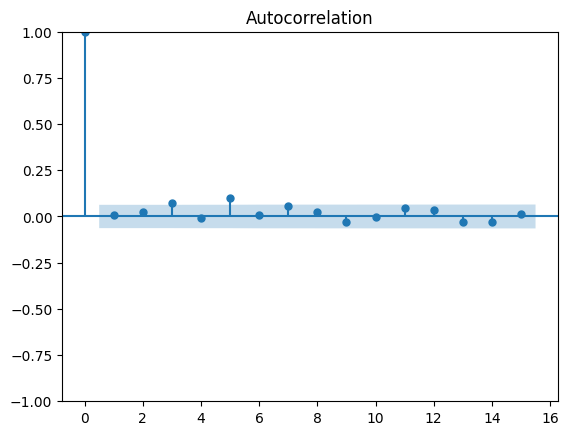

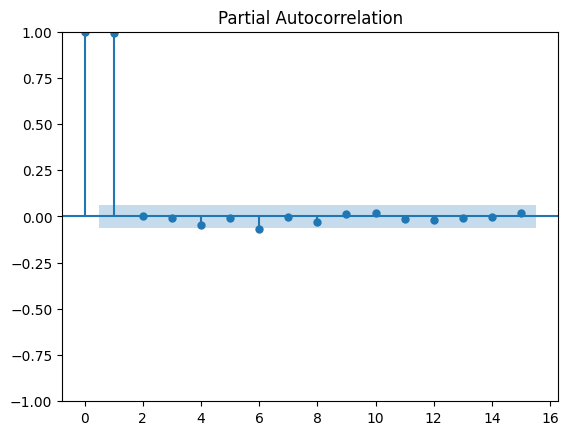

8


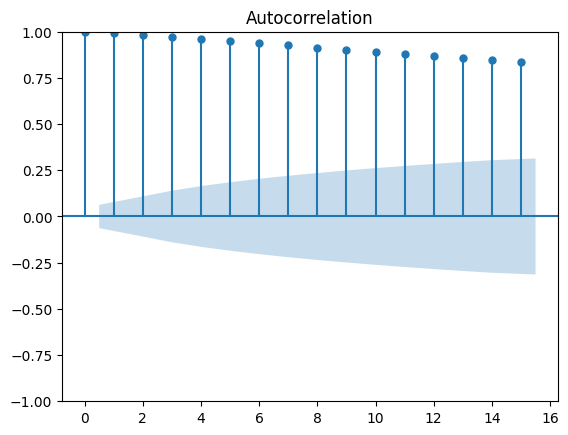

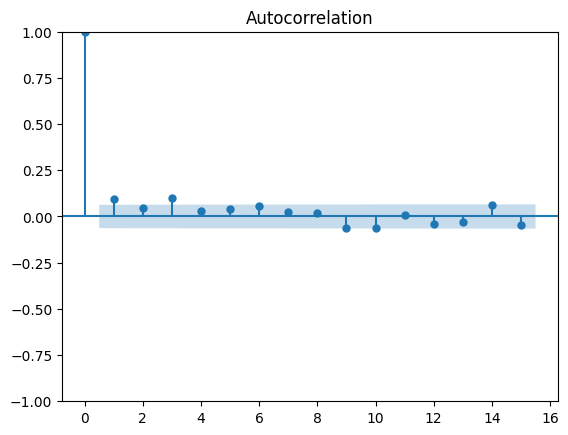

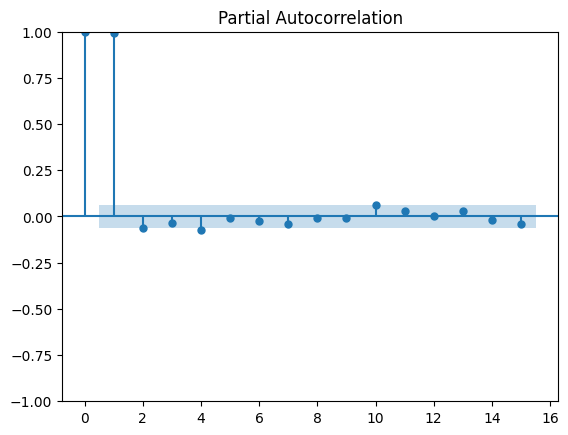

In [ ]:
for product_id in df["PRODUCT_ID"].unique():
  product_data = df[df["PRODUCT_ID"] == product_id]
  product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
  print(product_id)
  product_data["PRICE_diff"] = (product_data["PRICE"]).diff()
  product_data["PRICE_diff"] = product_data["PRICE_diff"].replace([np.inf, -np.inf], np.nan)
  product_data = product_data.dropna(subset=["PRICE_diff"])

  plot_acf(product_data["PRICE"],lags=15)
  plot_acf(product_data["PRICE_diff"], lags=15)
  plot_pacf(product_data["PRICE"], lags =15)
  # print(acf(product_data["PRICE"]))
  # print(acf(product_data["PRICE_diff"]))
  # print(pacf(product_data["PRICE"]))
  plt.show()

In [ ]:
# for product_id 1 only
# Fitting ARIMA model by chosing p, d, q values as per our observation
product_data = df[df["PRODUCT_ID"] == 1]
product_data = product_data.sort_values(by="SURVEY_DATE", ascending=True)
product_data["PRICE_diff"] = (product_data["PRICE"]).diff()
product_data["PRICE_diff"] = product_data["PRICE_diff"].replace([np.inf, -np.inf], np.nan)
product_data = product_data.dropna(subset=["PRICE_diff"])

p = 1     # ACF at lag 1 is significant
d = 1     # because differencing it for 1 time made the data stationary
q = 2     # PACF si significsnt till lag 2.

model = ARIMA(product_data["PRICE"], order=(p, d, q))
model_fit = model.fit()

# Forecasting values
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecasted values:", forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Forecasted values: 965    1890.122532
966    1890.490934
967    1890.135681
968    1890.478254
969    1890.147909
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
